In [1344]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels
from warnings import filterwarnings
filterwarnings("ignore")

In [1345]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.20.1
Pandas version: 1.2.4
Seaborn version: 0.11.1
Matplotlib version: 3.3.4
Sklearn version: 0.23.1
Statsmodels version: 0.13.2


### 1.Read the data as an appropriate Time Series data and plot the data.

In [1346]:
df = pd.read_csv('Sparkling.csv')
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [1347]:
Time_Stamp = pd.date_range(start='1980-01-01',periods=len(df),freq='M')
Time_Stamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [1348]:
df['Time_Stamp'] = Time_Stamp
df.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [1349]:
df.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')
df.drop(labels='YearMonth', axis=1, inplace=True)
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


### Plotting the Time Series to understand the behaviour of the data

In [1350]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

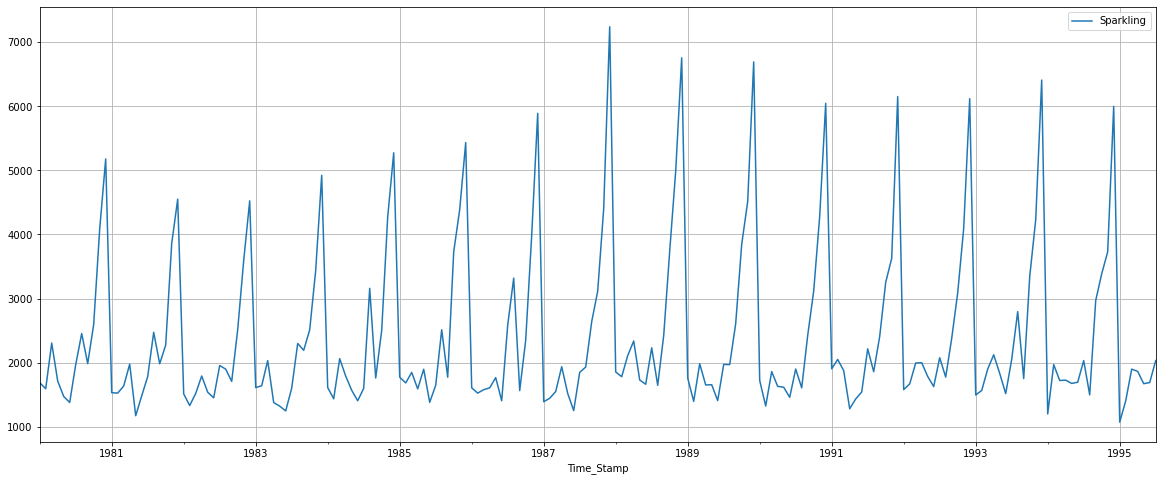

In [1351]:
df.plot(grid=True);

We can see that there is a trend with a seasonal pattern associated as well.

### Check the basic measures of descriptive statistics

In [1352]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


The basic measures of descriptive statistics tell us how the Sparkling have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

### 2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.


### Plotting the boxplot to understand the spread across different years and within different months across years.

### Yearly Boxplot

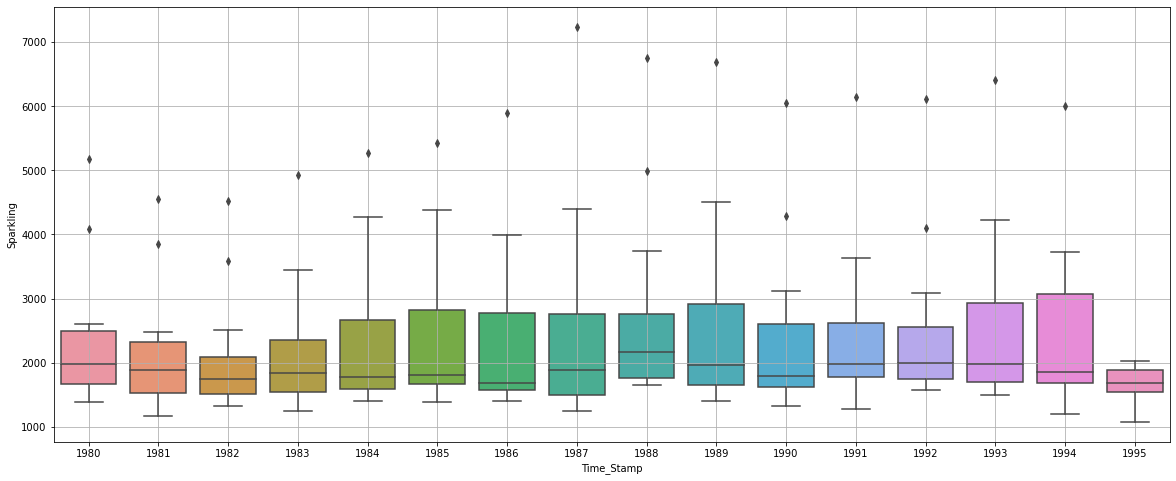

In [1353]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

The yearly boxplots also shows that the Sparkling have reminded constant over years.

### Year plot

Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [1354]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

,Sparkling
Time_Stamp,
1980-12-31,28406
1981-12-31,26227
1982-12-31,25321
1983-12-31,26180
1984-12-31,28431


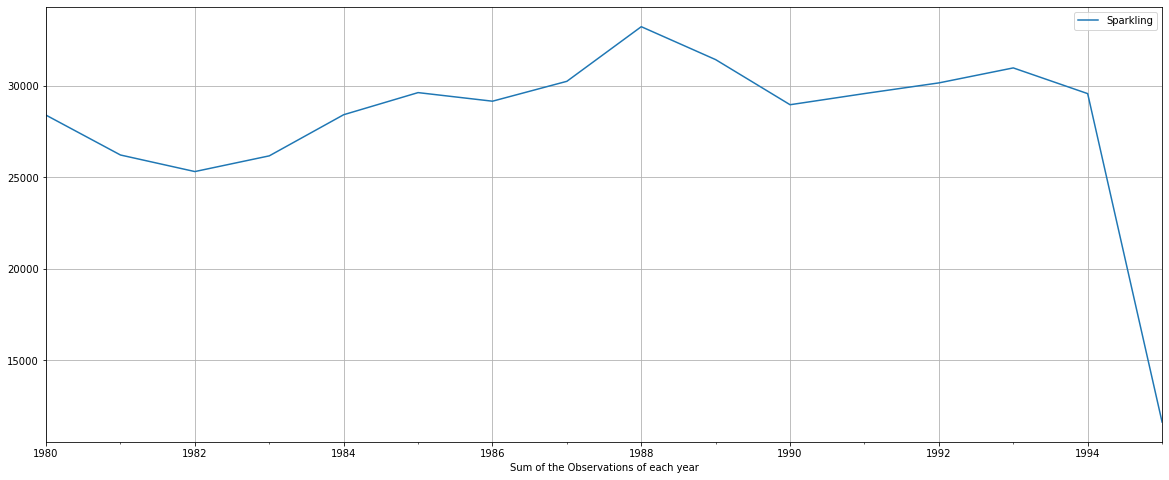

In [1355]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [1356]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

,Sparkling
Time_Stamp,
1980-12-31,2367.166667
1981-12-31,2185.583333
1982-12-31,2110.083333
1983-12-31,2181.666667
1984-12-31,2369.250000


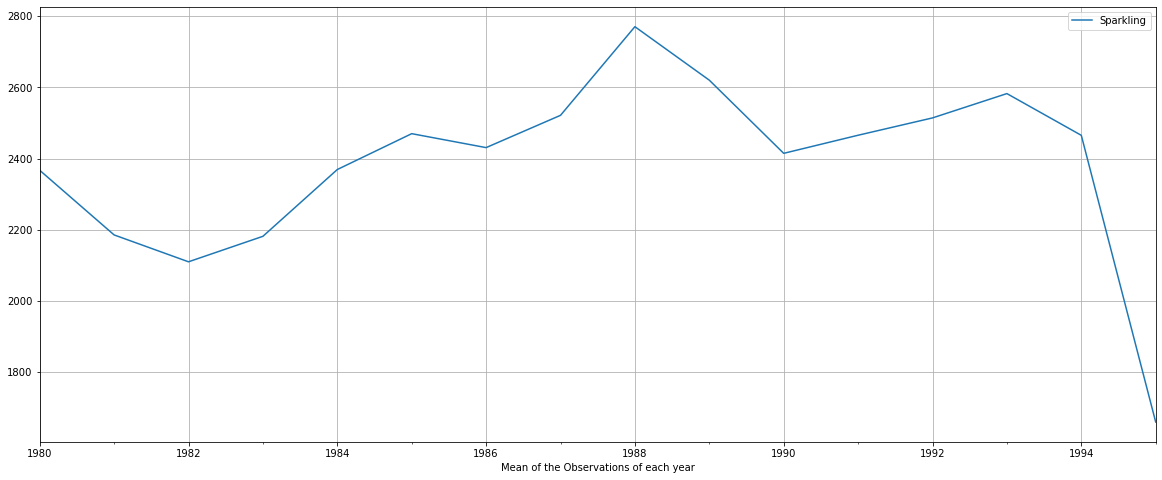

In [1357]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

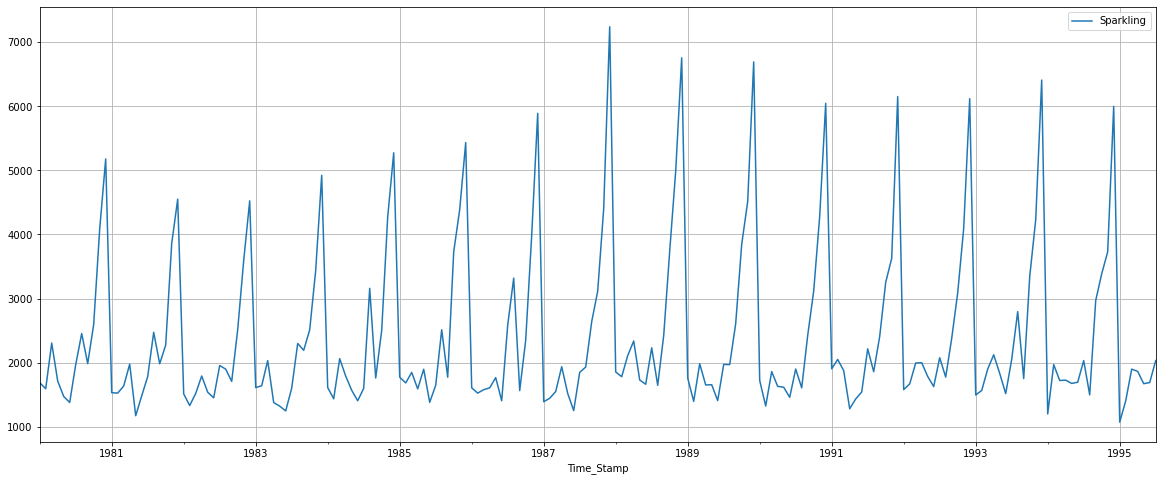

In [1358]:
df.plot()
plt.grid();

The resampled yearly or annual series have smoothened out the seasonality and have only been able to capture the year on year trend where there was.

### Quarterly Plot

In [1359]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

,Sparkling
Time_Stamp,
1980-03-31,5581
1980-06-30,4560
1980-09-30,6403
1980-12-31,11862
1981-03-31,4686


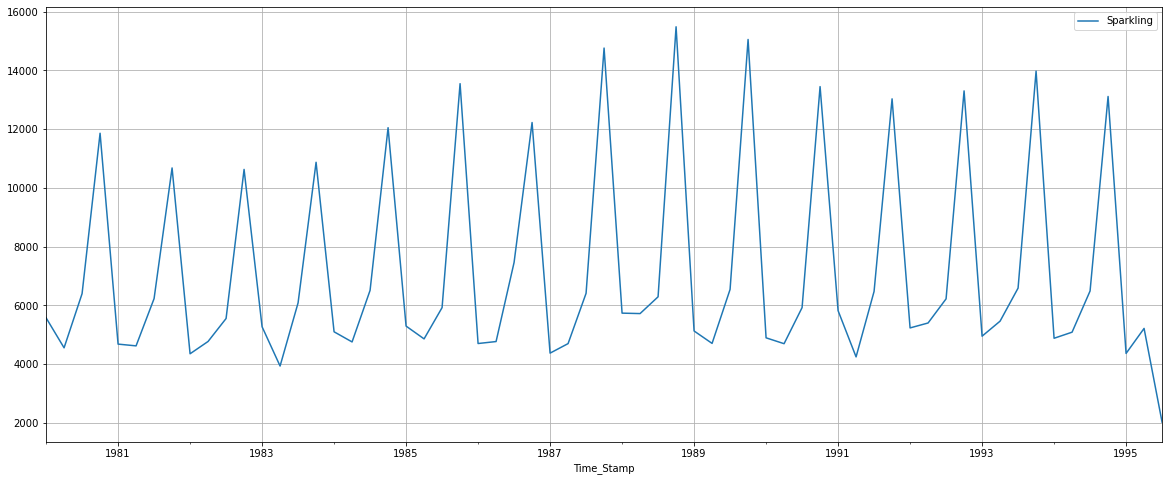

In [1360]:
df_quarterly_sum.plot();
plt.grid()

In [1361]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

,Sparkling
Time_Stamp,
1980-03-31,1860.333333
1980-06-30,1520.000000
1980-09-30,2134.333333
1980-12-31,3954.000000
1981-03-31,1562.000000


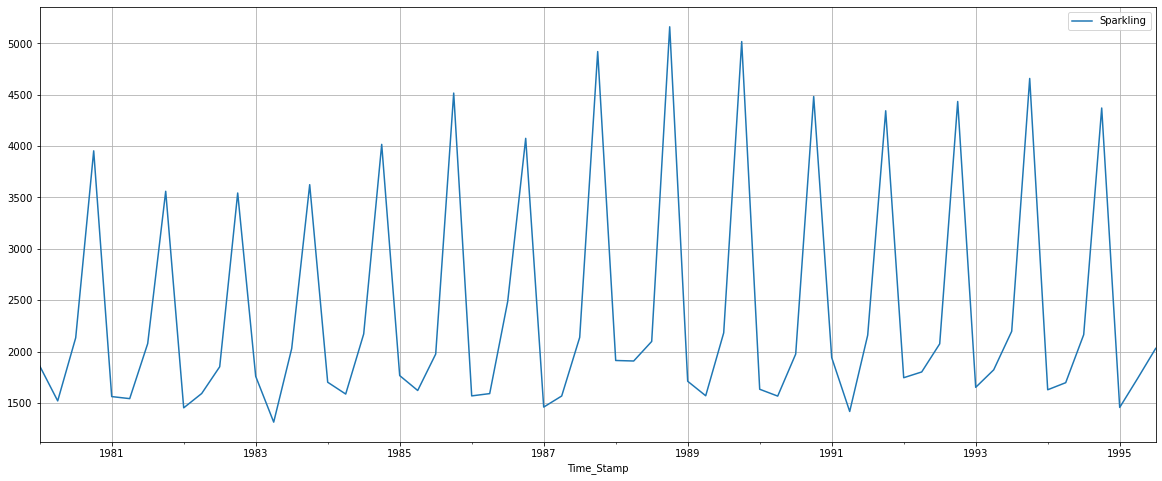

In [1362]:
df_quarterly_mean.plot();
plt.grid()

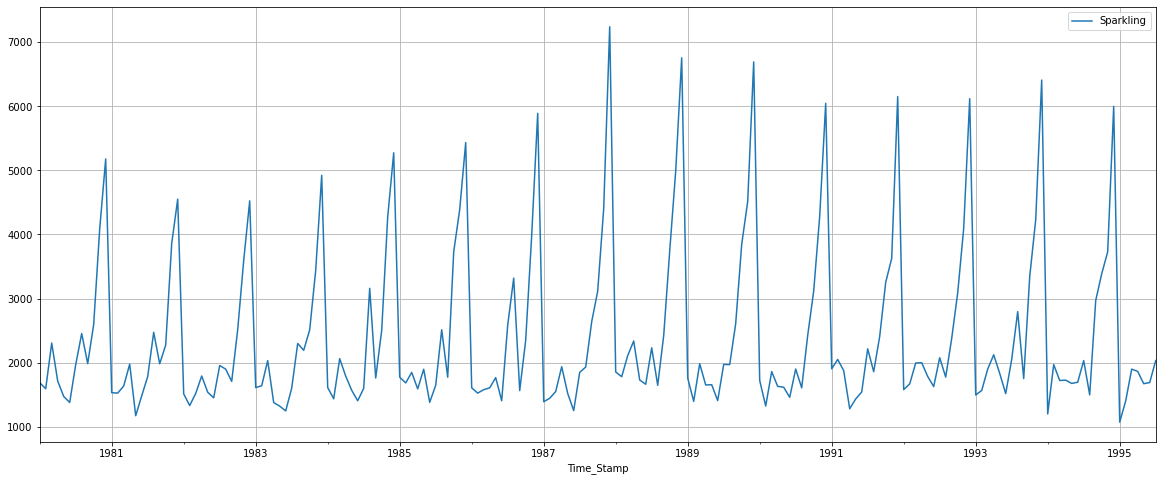

In [1363]:
df.plot()
plt.grid();

We see that the year on year quarterly series represents the year on year monthly series. The quarterly series is able to catch the seasonality in the data.

### Daily Plot

Now, let us try to understand the data from a daily perspective

In [1364]:
df_daily_sum = df.resample('D').sum()
df_daily_sum

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-01,0
1980-02-02,0
1980-02-03,0
1980-02-04,0
...,...
1995-07-27,0
1995-07-28,0
1995-07-29,0


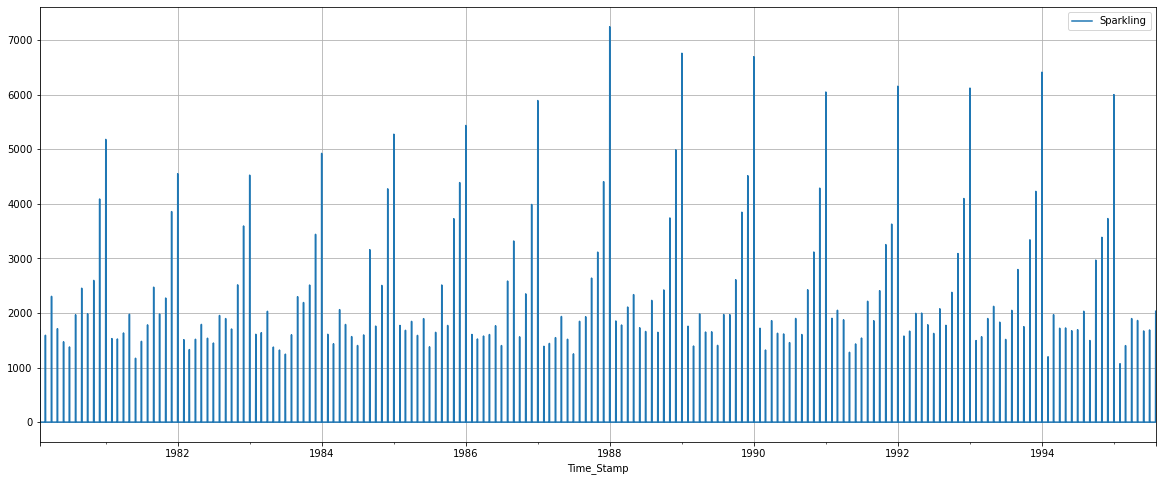

In [1365]:
df_daily_sum.plot()
plt.grid();

The above graph fails to give us a proper understanding of our data. Thus, resampling the data to intervals where a number of observations are 0 is not a good idea as that does not give us an understanding of the performance of the time series.

To get a very high-level overview of the trend of the Time Series Data (if Trend is present) can be understood by resampling the data keeping the intervals very large.

### Decade Plot

In [1366]:
df_decade_sum = df.resample('10Y').sum()
df_decade_sum

,Sparkling
Time_Stamp,
1980-12-31,28406
1990-12-31,288893
2000-12-31,131953


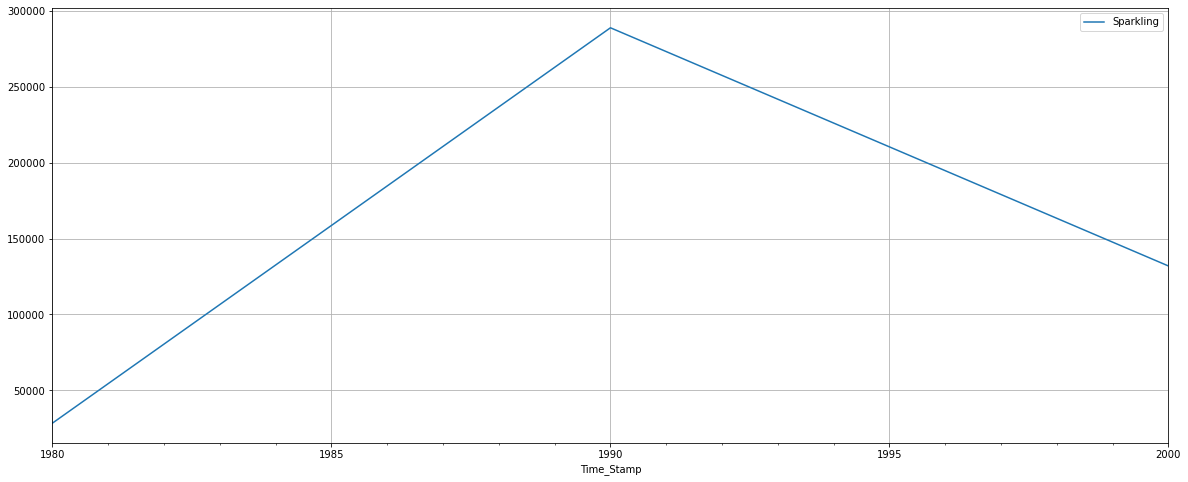

In [1367]:
df_decade_sum.plot();
plt.grid()

If we take the resampling period to be 10 years or a decade, we see that the seasonality present has been smoothed over and it is only giving an estimate of the trend.

### Monthly BoxPlot

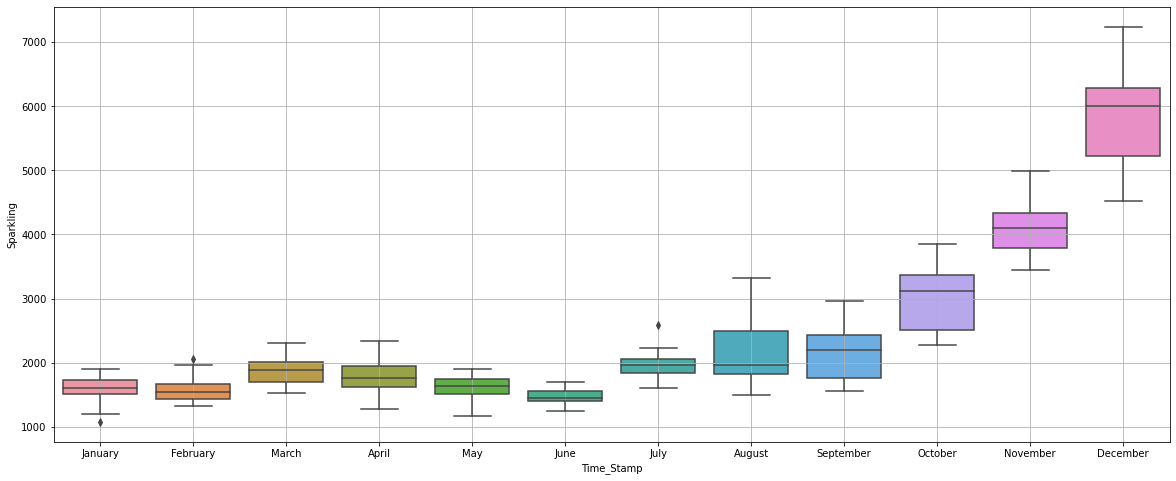

In [1368]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

There is a clear distinction of 'Sparkling' within different months spread across various years. The highest such numbers are being recorded in the month of November-December across various years.

### Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

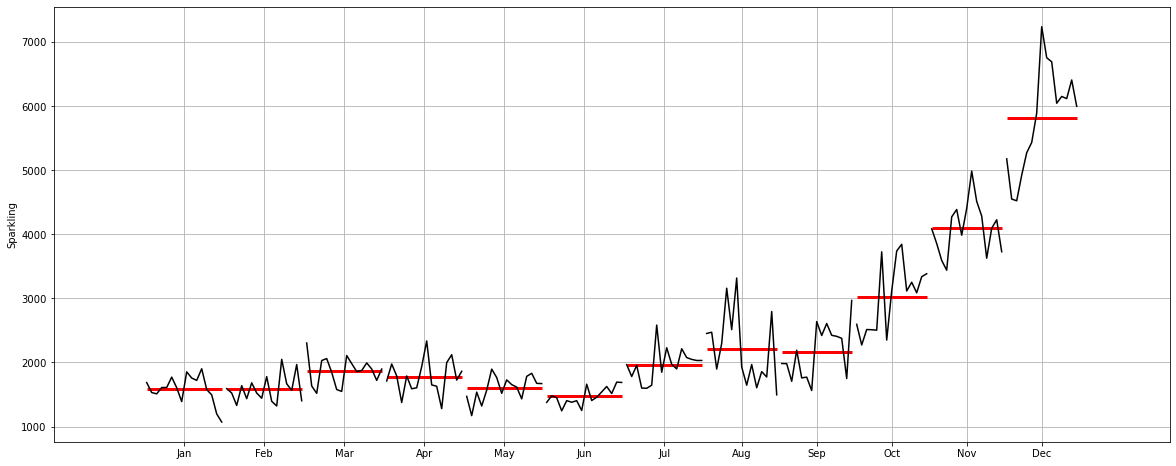

In [1369]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Sparkling'],ylabel='Sparkling')
plt.grid();

This plot shows us the behaviour of the Time Series ('Sparkling' in this case) across various months. The red line is the median value.

### Plot a graph of monthly Sparkling across years.

In [1370]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


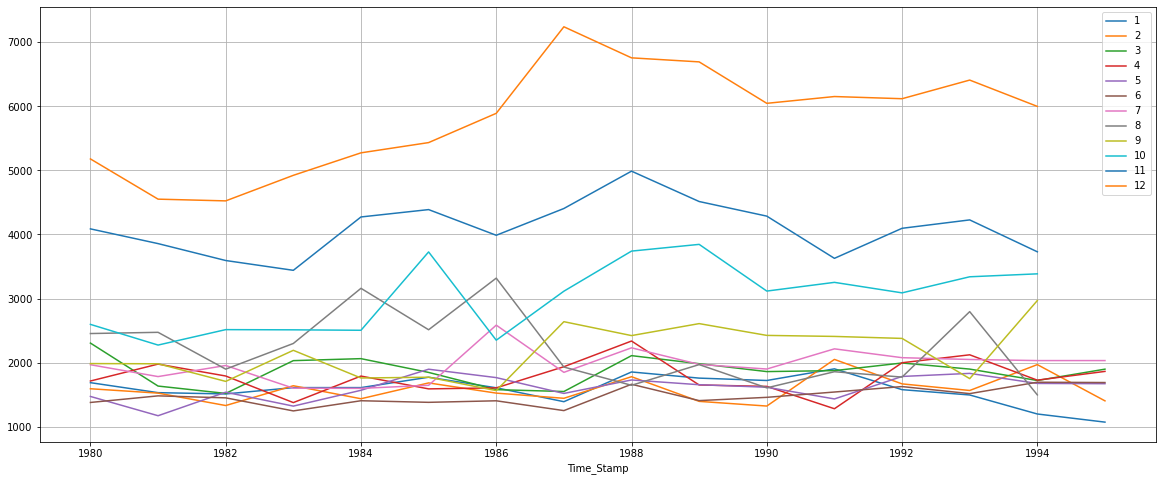

In [1371]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

### Plot the Empirical Cumulative Distribution.

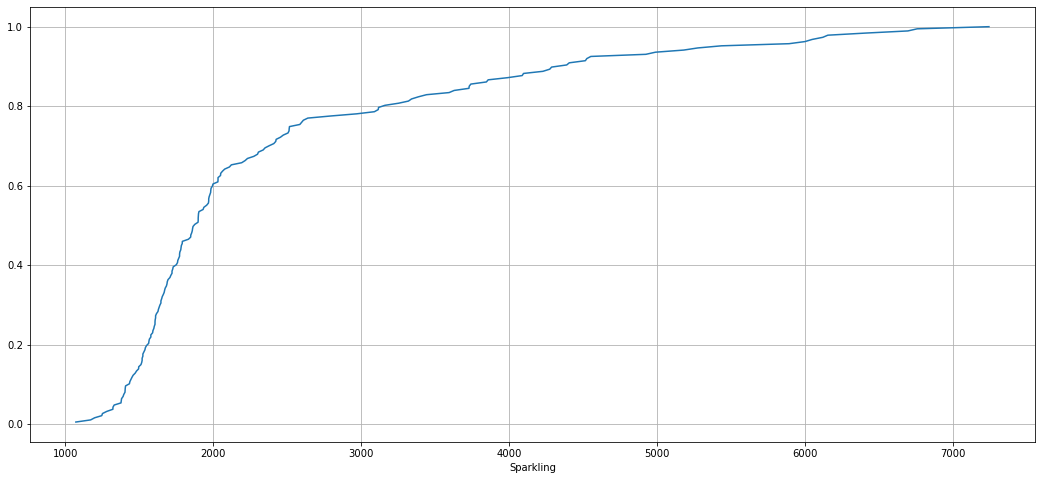

In [1372]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling');

This particular graph tells us what percentage of data points refer to what number of Sparklings.

### Plot the average Sparkling per month and the month on month percentage change of Sparkling.

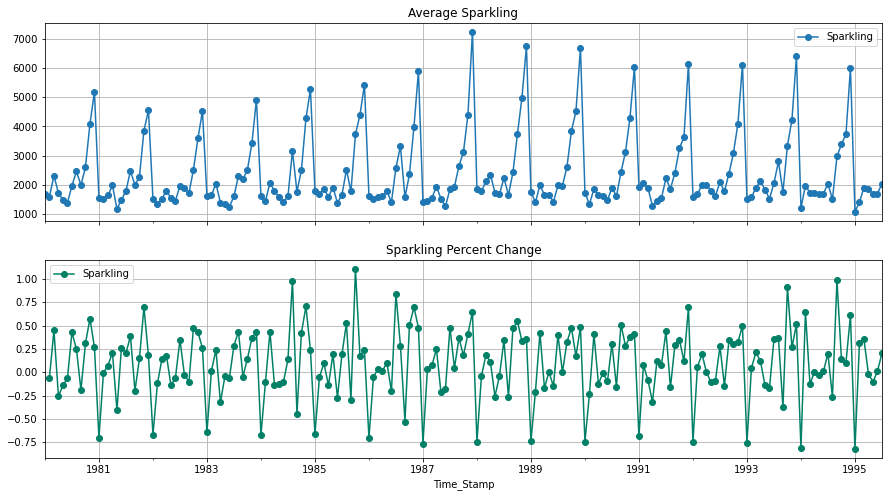

In [1373]:
# group by date and get average Sparkling, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sparkling over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sparkling over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Percent Change",grid=True)

The above two graphs tells us the Average 'Sparkling' and the Percentage change of 'Sparkling' with respect to the time.

### Decompose the Time Series and plot the different components.

In [1374]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

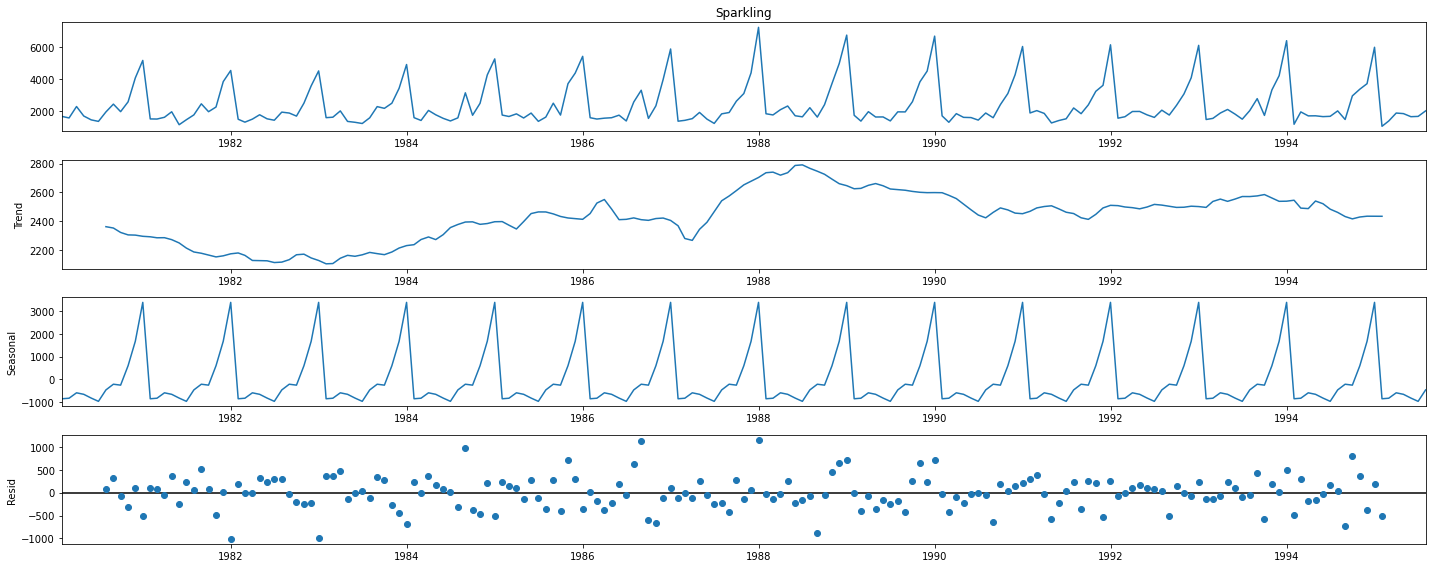

In [1375]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [1376]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

In [1377]:
#Since this is an additive model:
#Observed = Trend + Seasonal + Irregular should hold true
2360.666667 -465.502265 +70.835599

1966.0000009999999

In [1378]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2431.502265
1980-08-31    2667.332821
1980-09-30    2238.677265
1980-10-31    1996.230043
1980-11-30    2411.932821
1980-12-31    1792.016154
dtype: float64

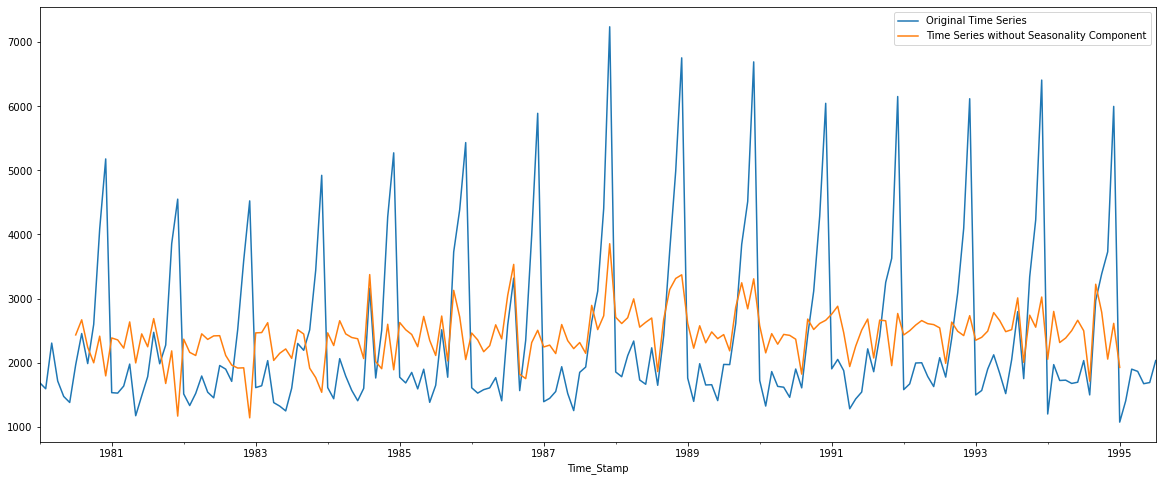

In [1379]:
df.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

### Multiplicative Decomposition

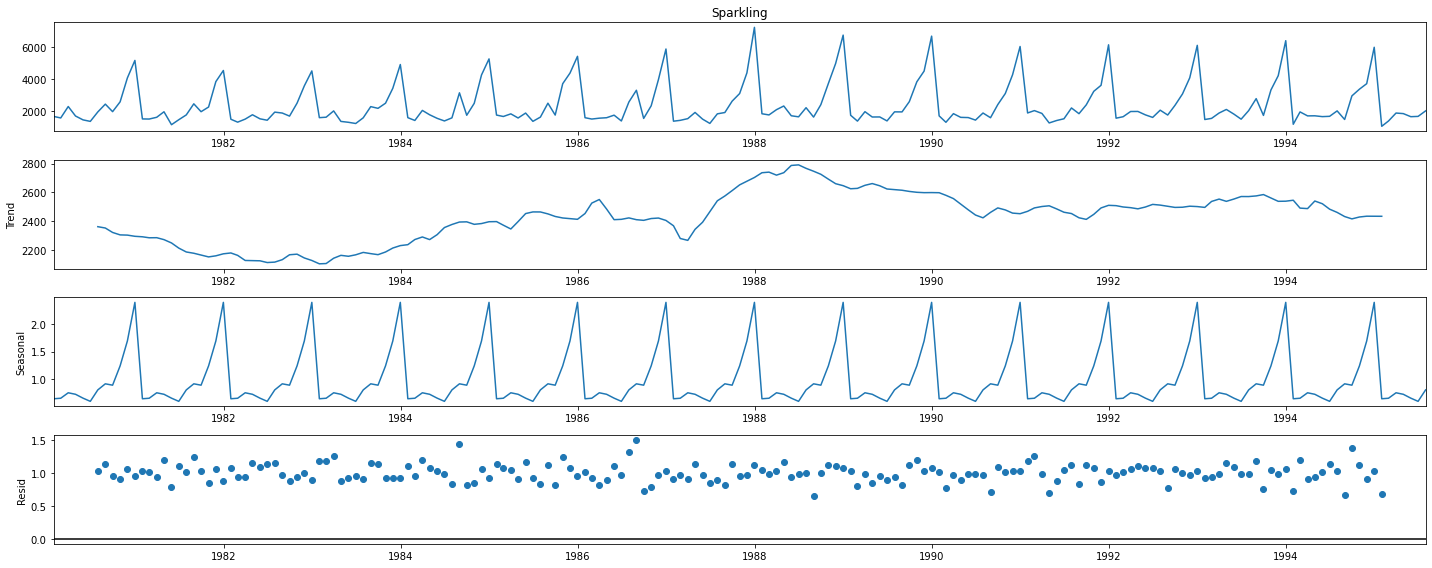

In [1380]:
decomposition_m = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition_m.plot();

In [1381]:
trend_m = decomposition_m.trend
seasonality_m = decomposition_m.seasonal
residual_m = decomposition_m.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

In [1382]:
deaseasonalized_ts_m = trend + residual
deaseasonalized_ts_m.head(12)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2431.502265
1980-08-31    2667.332821
1980-09-30    2238.677265
1980-10-31    1996.230043
1980-11-30    2411.932821
1980-12-31    1792.016154
dtype: float64

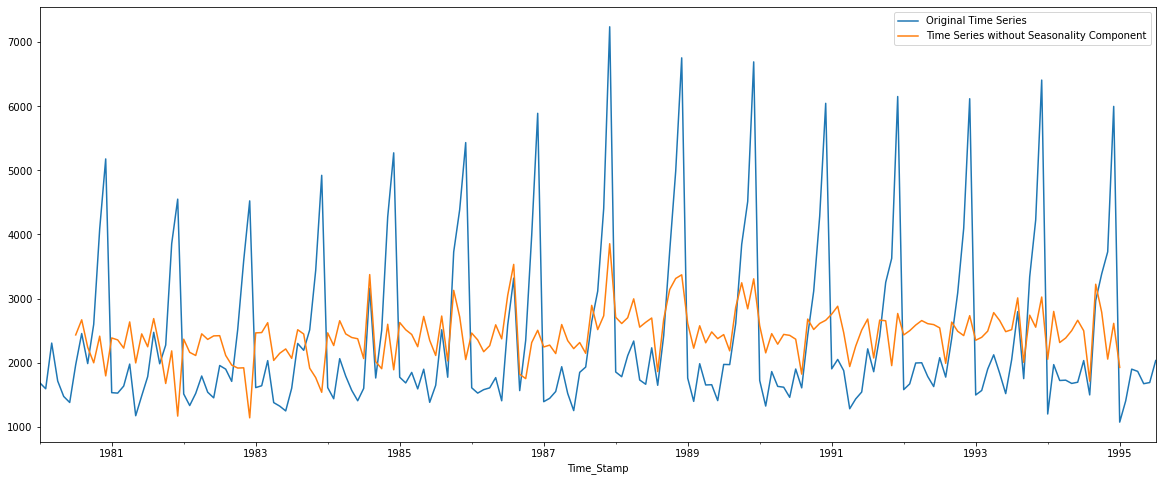

In [1383]:
df.plot()
deaseasonalized_ts_m.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

### 3. Split the data into training and test. The test data should start in 1991.

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [1384]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [1385]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [1386]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


In [1387]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Exponential Smoothing methods
Exponential smoothing methods consist of flattening time series data. 

Exponential smoothing averages or exponentially weighted moving averages consist of forecast based on previous periods data with exponentially declining influence on the older observations.

Exponential smoothing methods consist of special case exponential moving with notation ETS (Error, Trend, Seasonality) where each can be none(N), additive (N), additive damped (Ad), Multiplicative (M) or multiplicative damped (Md).

One or more parameters control how fast the weights decay.

These parameters have values between 0 and 1

### SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors
#### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES).
#### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

 - Ft+1=αYt+(1−α)Ft
 
Parameter α is called the smoothing constant and its value lies between 0 and 1. Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

#### Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.
SimpleExpSmoothing class must be instantiated and passed the training data.

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. If this is omitted or set to None, the model will automatically optimize the value.

In [1388]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   pylab                           import rcParams

In [1389]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [1390]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [1391]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.07029120765764557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137060346985,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1392]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    2804.675124
1991-02-28    2804.675124
1991-03-31    2804.675124
1991-04-30    2804.675124
1991-05-31    2804.675124
1991-06-30    2804.675124
1991-07-31    2804.675124
1991-08-31    2804.675124
1991-09-30    2804.675124
1991-10-31    2804.675124
1991-11-30    2804.675124
1991-12-31    2804.675124
1992-01-31    2804.675124
1992-02-29    2804.675124
1992-03-31    2804.675124
1992-04-30    2804.675124
1992-05-31    2804.675124
1992-06-30    2804.675124
1992-07-31    2804.675124
1992-08-31    2804.675124
1992-09-30    2804.675124
1992-10-31    2804.675124
1992-11-30    2804.675124
1992-12-31    2804.675124
1993-01-31    2804.675124
1993-02-28    2804.675124
1993-03-31    2804.675124
1993-04-30    2804.675124
1993-05-31    2804.675124
1993-06-30    2804.675124
1993-07-31    2804.675124
1993-08-31    2804.675124
1993-09-30    2804.675124
1993-10-31    2804.675124
1993-11-30    2804.675124
1993-12-31    2804.675124
1994-01-31    2804.675124
1994-02-28    2804.675124
1994-03-31  

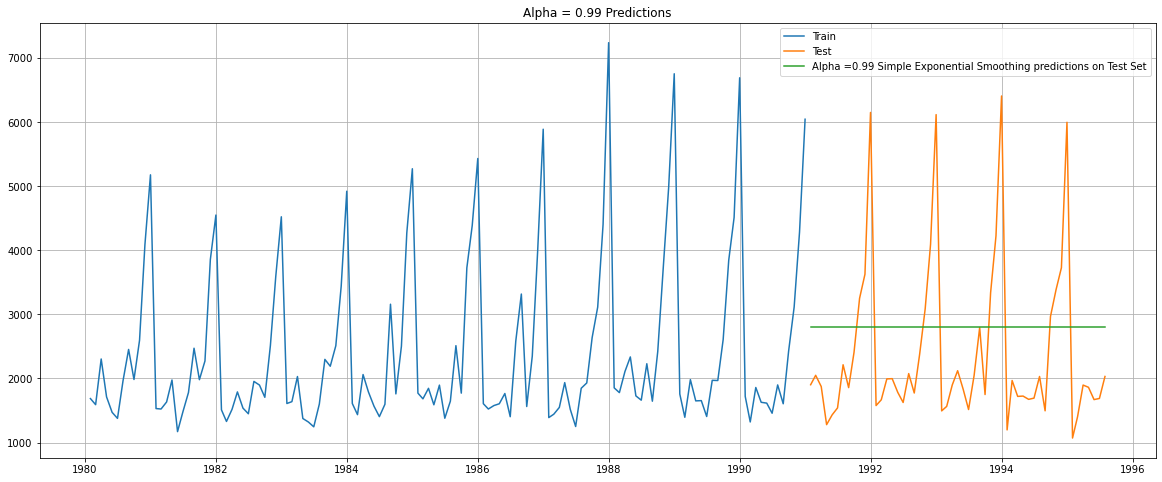

In [1393]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [1394]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [1395]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1338.0083844916467
SES RMSE (calculated using statsmodels): 1338.0083844916464


In [1396]:
resultsDf_temp_A = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf_temp_A

,Test RMSE
"Alpha=0.99,SES",1338.008384


### Holt - ETS(A, A, N) - Holt's linear method with additive errors
### Double Exponential Smoothing
- One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.

- This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.

- Applicable when data has Trend but no seasonality.

- Two separate components are considered: Level and Trend.

- Level is the local mean.

- One smoothing parameter α corresponds to the level series

- A second smoothing parameter β corresponds to the trend series.

#### Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.

- Intercept or Level equation, Lt is given by: Lt=αYt+(1−α)Ft
- Trend equation is given by Tt=β(Lt−Lt−1)+(1−β)Tt−1

Here, α and β are the smoothing constants for level and trend, respectively,

0 <α < 1 and 0 < β < 1.

The forecast at time t + 1 is given by

- Ft+1=Lt+Tt
- Ft+n=Lt+nTt

In [1397]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [1398]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31    5401.733026
1991-02-28    5476.005230
1991-03-31    5550.277433
1991-04-30    5624.549637
1991-05-31    5698.821840
1991-06-30    5773.094044
1991-07-31    5847.366248
1991-08-31    5921.638451
1991-09-30    5995.910655
1991-10-31    6070.182858
1991-11-30    6144.455062
1991-12-31    6218.727266
1992-01-31    6292.999469
1992-02-29    6367.271673
1992-03-31    6441.543876
1992-04-30    6515.816080
1992-05-31    6590.088284
1992-06-30    6664.360487
1992-07-31    6738.632691
1992-08-31    6812.904894
1992-09-30    6887.177098
1992-10-31    6961.449302
1992-11-30    7035.721505
1992-12-31    7109.993709
1993-01-31    7184.265912
1993-02-28    7258.538116
1993-03-31    7332.810320
1993-04-30    7407.082523
1993-05-31    7481.354727
1993-06-30    7555.626930
1993-07-31    7629.899134
1993-08-31    7704.171338
1993-09-30    7778.443541
1993-10-31    7852.715745
1993-11-30    7926.987948
1993-12-31    8001.260152
1994-01-31    8075.532356
1994-02-28    8149.804559
1994-03-31  

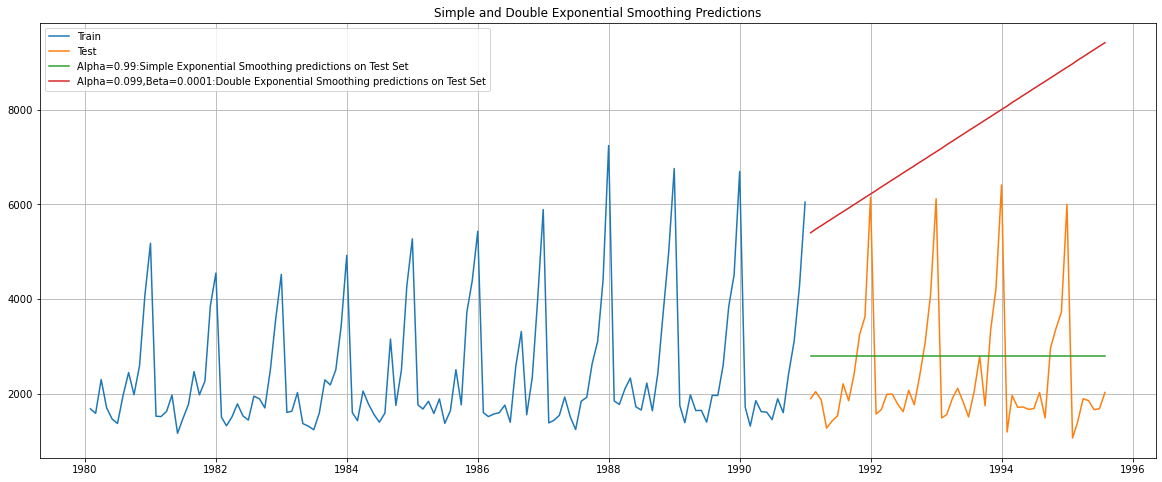

In [1399]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is remaining constant along with both the trend component as well level component as well.

In [1400]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 5291.8798332269125


In [1401]:
resultsDf_temp_B = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp_B])
resultsDf

,RMSE,MAPE,Test RMSE
"ARIMA(2,1,1)",1300.721382,39.860000,NaN
"SARIMA(1, 1, 0)(1,0,2)12",1439.473787,53.900000,NaN
"ARIMA(3,1,3)",1229.030437,39.535636,NaN
"SARIMA(3,1,3)(0,0,3,6)",1238.547924,44.849871,NaN
RegressionOnTime,NaN,NaN,1798.200700
NaiveModel,NaN,NaN,3864.279352
SimpleAverageModel,NaN,NaN,1275.081804
"SARIMA(3,1,3)(0,0,3,6)",1238.547924,44.849871,NaN
"Alpha=1,Beta=0.0189:DES",NaN,NaN,5291.879833


### Inference
Here, we see that the Simple Exponential Smoothing has actually done well when compared to the Double Exponential Smoothing. This is because of the fact that the simple Exponential Smoothing model has maintained constant with the trend component as well.

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast.

### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [1402]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127227248079453, 'smoothing_trend': 0.012360804305088534, 'smoothing_seasonal': 0.46071766688111543, 'damping_trend': nan, 'initial_level': 2356.577980956387, 'initial_trend': -0.10243675533021725, 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
       -808.42473284, -815.34991402, -384.23065038,   72.99484403,
       -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [1403]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-31    1490.402890
1991-02-28    1204.525152
1991-03-31    1688.734182
1991-04-30    1551.226125
1991-05-31    1461.197883
1991-06-30    1278.646707
1991-07-31    1804.885616
1991-08-31    1678.955032
1991-09-30    2315.373126
1991-10-31    3224.976222
1991-11-30    4299.301434
1991-12-31    6410.712237
1992-01-31    1482.829908
1992-02-29    1196.952170
1992-03-31    1681.161200
1992-04-30    1543.653143
1992-05-31    1453.624901
1992-06-30    1271.073725
1992-07-31    1797.312634
1992-08-31    1671.382050
1992-09-30    2307.800144
1992-10-31    3217.403240
1992-11-30    4291.728452
1992-12-31    6403.139255
1993-01-31    1475.256926
1993-02-28    1189.379188
1993-03-31    1673.588218
1993-04-30    1536.080160
1993-05-31    1446.051919
1993-06-30    1263.500743
1993-07-31    1789.739652
1993-08-31    1663.809068
1993-09-30    2300.227162
1993-10-31    3209.830258
1993-11-30    4284.155470
1993-12-31    6395.566273
1994-01-31    1467.683944
1994-02-28    1181.806206
1994-03-31  

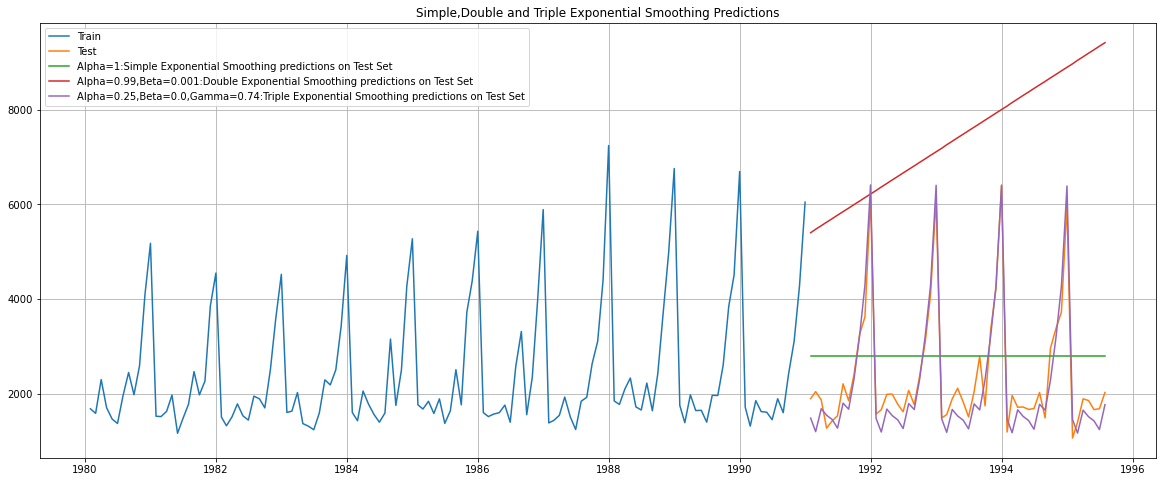

In [1404]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is remaining constant the seasonal component as well.

In [1405]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 378.95102286703


In [1406]:
resultsDf_temp_D = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp_D])
resultsDf

,RMSE,MAPE,Test RMSE
"ARIMA(2,1,1)",1300.721382,39.860000,NaN
"SARIMA(1, 1, 0)(1,0,2)12",1439.473787,53.900000,NaN
"ARIMA(3,1,3)",1229.030437,39.535636,NaN
"SARIMA(3,1,3)(0,0,3,6)",1238.547924,44.849871,NaN
RegressionOnTime,NaN,NaN,1798.200700
NaiveModel,NaN,NaN,3864.279352
SimpleAverageModel,NaN,NaN,1275.081804
"SARIMA(3,1,3)(0,0,3,6)",1238.547924,44.849871,NaN
"Alpha=1,Beta=0.0189:DES",NaN,NaN,5291.879833
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",NaN,NaN,378.951023


### Inference
Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality.

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method
ETS(A, A, M) model

In [1407]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11133818361298699, 'smoothing_trend': 0.049505131019509915, 'smoothing_seasonal': 0.3620795793580111, 'damping_trend': nan, 'initial_level': 2356.4967888704355, 'initial_trend': -10.187944726007238, 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
       0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
       1.87340336, 2.37811768]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [1408]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-31    1587.497468
1991-02-28    1356.394925
1991-03-31    1762.929755
1991-04-30    1656.165933
1991-05-31    1542.002730
1991-06-30    1355.102435
1991-07-31    1854.197719
1991-08-31    1820.513188
1991-09-30    2276.971718
1991-10-31    3122.024202
1991-11-30    4128.528561
1991-12-31    5890.064588
1992-01-31    1538.233708
1992-02-29    1314.193684
1992-03-31    1707.937498
1992-04-30    1604.369388
1992-05-31    1493.650618
1992-06-30    1312.499576
1992-07-31    1795.750753
1992-08-31    1762.976871
1992-09-30    2204.819253
1992-10-31    3022.831861
1992-11-30    3997.009544
1992-12-31    5701.930382
1993-01-31    1488.969948
1993-02-28    1271.992443
1993-03-31    1652.945240
1993-04-30    1552.572843
1993-05-31    1445.298507
1993-06-30    1269.896716
1993-07-31    1737.303788
1993-08-31    1705.440555
1993-09-30    2132.666788
1993-10-31    2923.639519
1993-11-30    3865.490526
1993-12-31    5513.796176
1994-01-31    1439.706189
1994-02-28    1229.791202
1994-03-31  

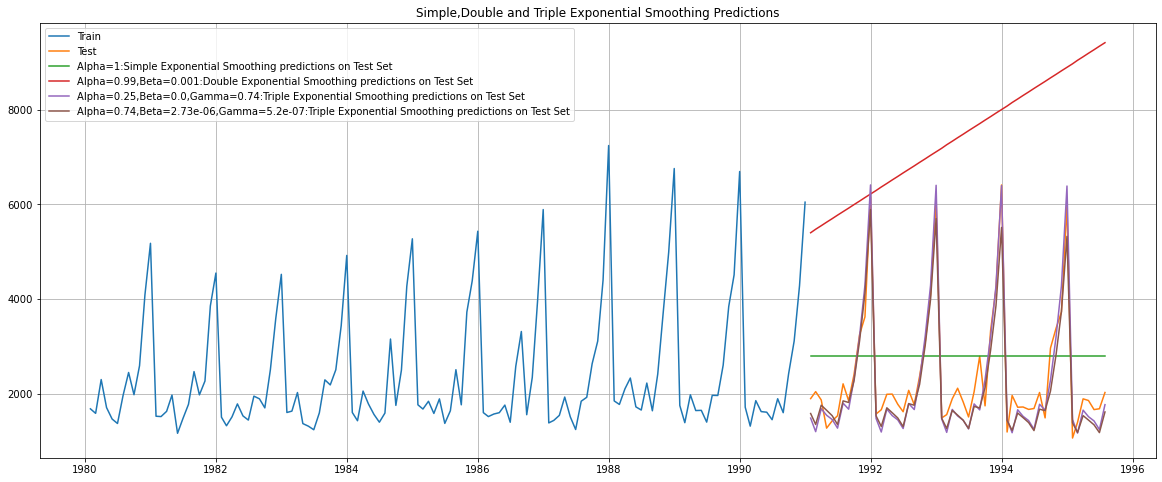

In [1409]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

### Report model accuracy

In [1410]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 404.286809456071


In [1411]:
resultsDf_temp_E = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf_A = pd.concat([resultsDf, resultsDf_temp_E])
resultsDf_A

,RMSE,MAPE,Test RMSE
"ARIMA(2,1,1)",1300.721382,39.860000,NaN
"SARIMA(1, 1, 0)(1,0,2)12",1439.473787,53.900000,NaN
"ARIMA(3,1,3)",1229.030437,39.535636,NaN
"SARIMA(3,1,3)(0,0,3,6)",1238.547924,44.849871,NaN
RegressionOnTime,NaN,NaN,1798.200700
NaiveModel,NaN,NaN,3864.279352
SimpleAverageModel,NaN,NaN,1275.081804
"SARIMA(3,1,3)(0,0,3,6)",1238.547924,44.849871,NaN
"Alpha=1,Beta=0.0189:DES",NaN,NaN,5291.879833
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",NaN,NaN,378.951023


We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

There are various other parameters in the models. Please do feel free to play around with those in the hope of getting a better forecast on the test set.

### Building different models and comparing the accuracy metrics.
### Model 1: Linear Regression
For this particular linear regression, we are going to regress the 'Births' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [1412]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [1413]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [1414]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Sparkling,time
Time_Stamp,,
1980-01-31,1686,1
1980-02-29,1591,2
1980-03-31,2304,3
1980-04-30,1712,4
1980-05-31,1471,5


Last few rows of Training Data


,Sparkling,time
Time_Stamp,,
1990-08-31,1605,128
1990-09-30,2424,129
1990-10-31,3116,130
1990-11-30,4286,131
1990-12-31,6047,132


First few rows of Test Data


,Sparkling,time
Time_Stamp,,
1991-01-31,1902,256
1991-02-28,2049,257
1991-03-31,1874,258
1991-04-30,1279,259
1991-05-31,1432,260


Last few rows of Test Data


,Sparkling,time
Time_Stamp,,
1995-03-31,1897,306
1995-04-30,1862,307
1995-05-31,1670,308
1995-06-30,1688,309
1995-07-31,2031,310


Now that our training and test data has been modified, let us go ahead use LinearRegression to build the model on the training data and test the model on the test data.

In [1415]:
from sklearn.linear_model import LinearRegression

In [1416]:
lr = LinearRegression()

In [1417]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

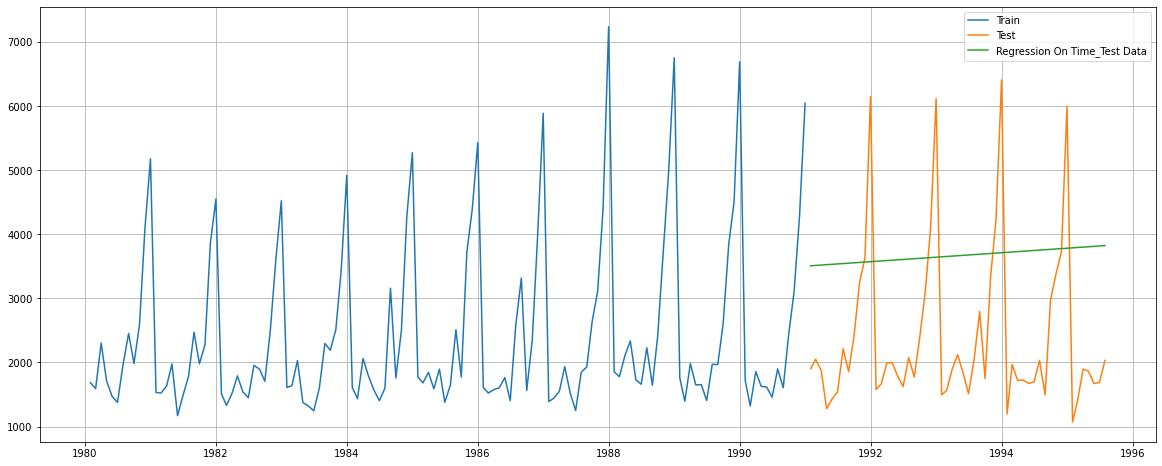

In [1418]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

### Defining the functions for calculating the accuracy metrics.

In [1419]:
from sklearn import metrics

### Model Evaluation

In [1420]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1798.201 


In [1421]:
resultsDf_1 = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf_1

,Test RMSE
RegressionOnTime,1798.2007


### Model 2: Naive Approach: y^t+1=yt
For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [1422]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [1423]:
train.tail()

,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


In [1424]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

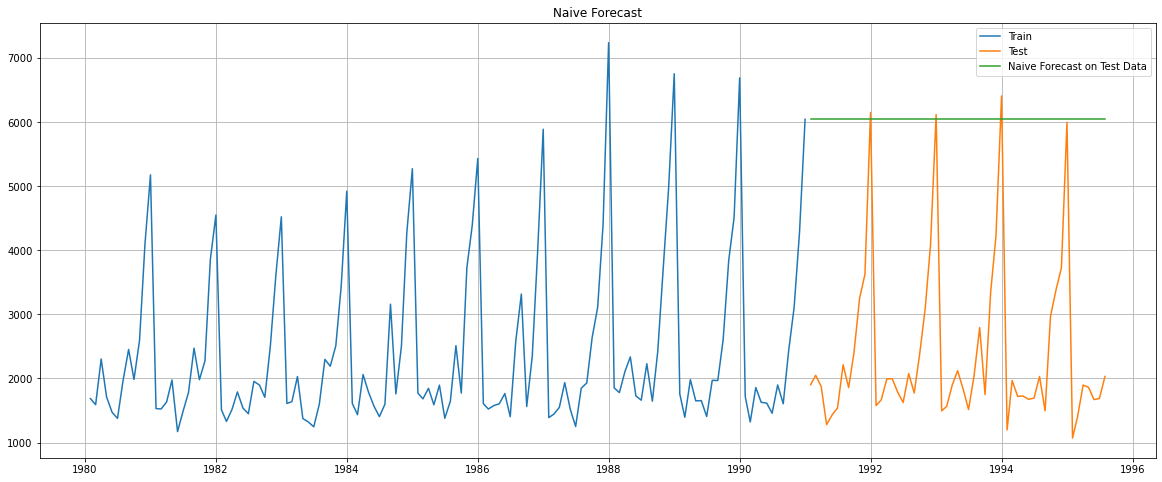

In [1425]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [1426]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [1427]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf_3 = pd.concat([resultsDf_1, resultsDf_2])
resultsDf_3

,Test RMSE
RegressionOnTime,1798.200700
NaiveModel,3864.279352


### Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [1428]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [1429]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


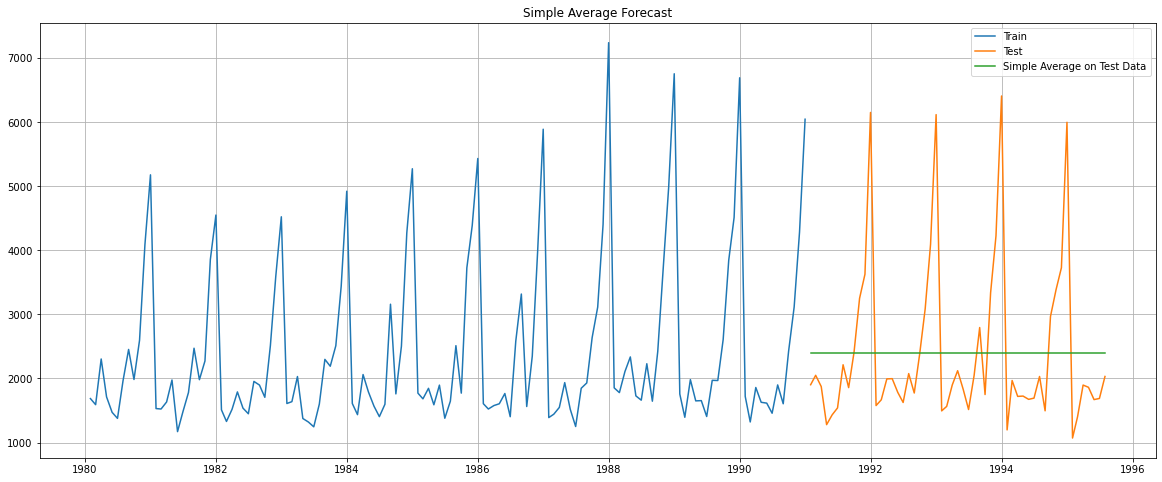

In [1430]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [1431]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [1432]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf_5 = pd.concat([resultsDf_3, resultsDf_4])
resultsDf_5

,Test RMSE
RegressionOnTime,1798.200700
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


We can see that the Simple Average model performs well compared to other models as the RMSE is less compared to others.

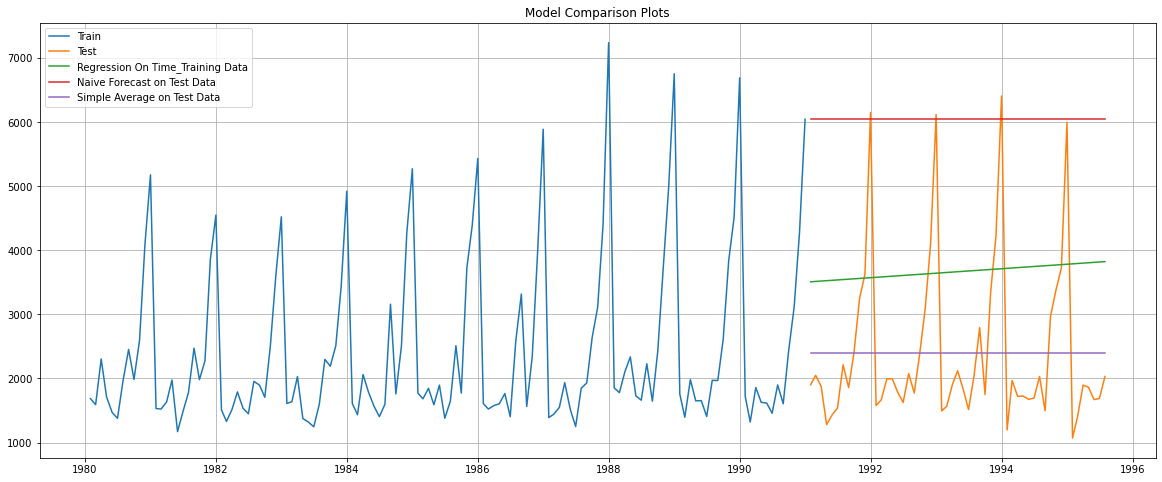

In [1433]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

- 𝐻0  : The Time Series has a unit root and is thus non-stationary.
- 𝐻1  : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the  𝛼  value.

In [1434]:

# Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

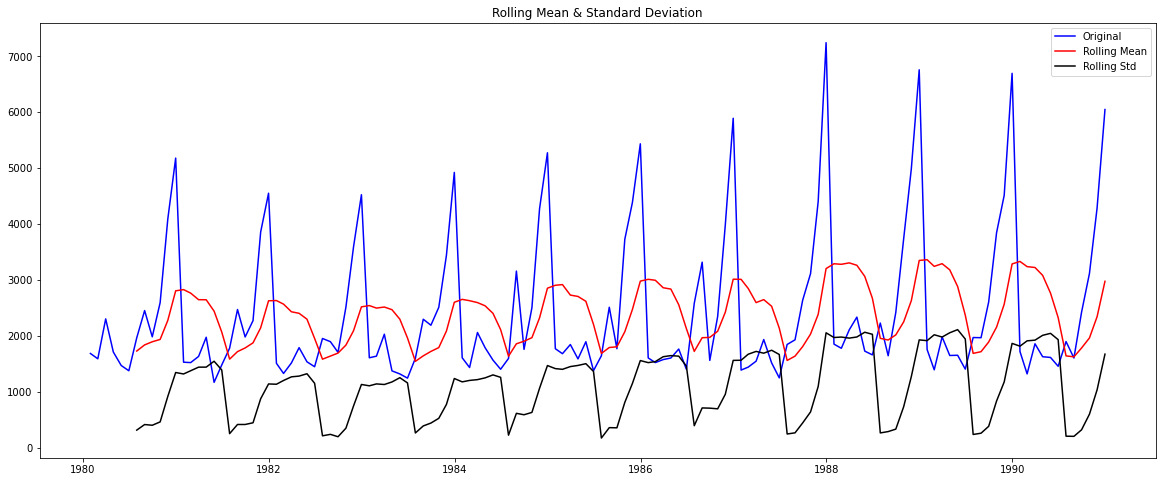

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [1435]:
test_stationarity(train['Sparkling'])

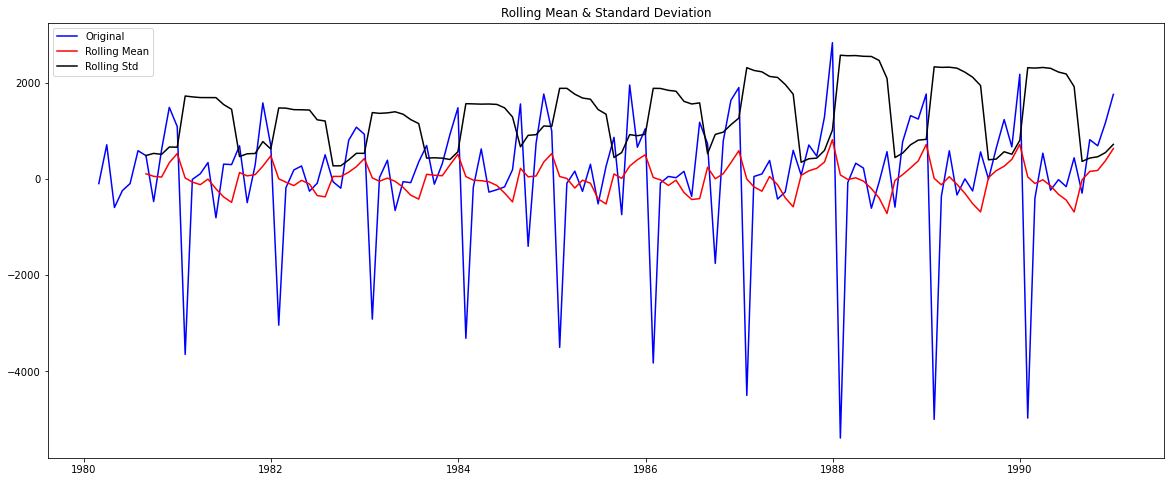

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [1436]:
test_stationarity(train.diff().dropna())

Going forward, for all the questions 'training data' means the data on which the model will be built and which is stationary in nature.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.


In [1437]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [1438]:
train_diff = train.diff(periods=1).dropna()
train_diff

,Sparkling
Time_Stamp,
1980-02-29,-95.0
1980-03-31,713.0
1980-04-30,-592.0
1980-05-31,-241.0
1980-06-30,-94.0
...,...
1990-08-31,-294.0
1990-09-30,819.0
1990-10-31,692.0


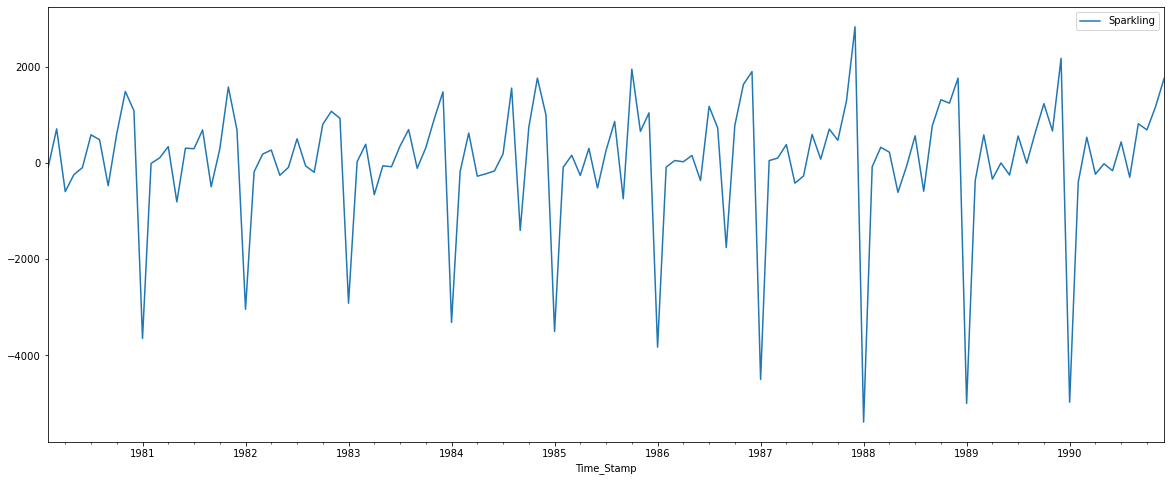

In [1439]:
train_diff.plot();

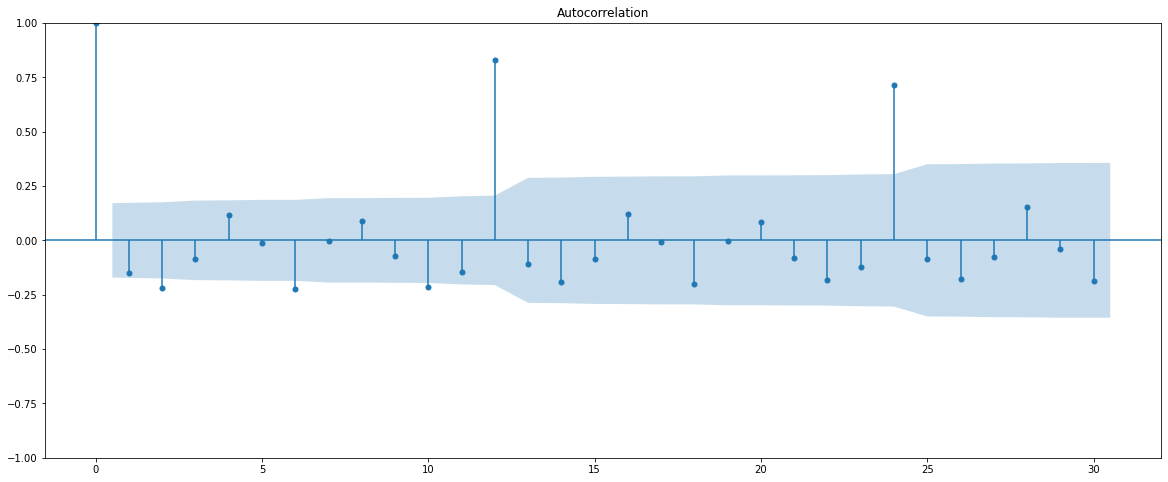

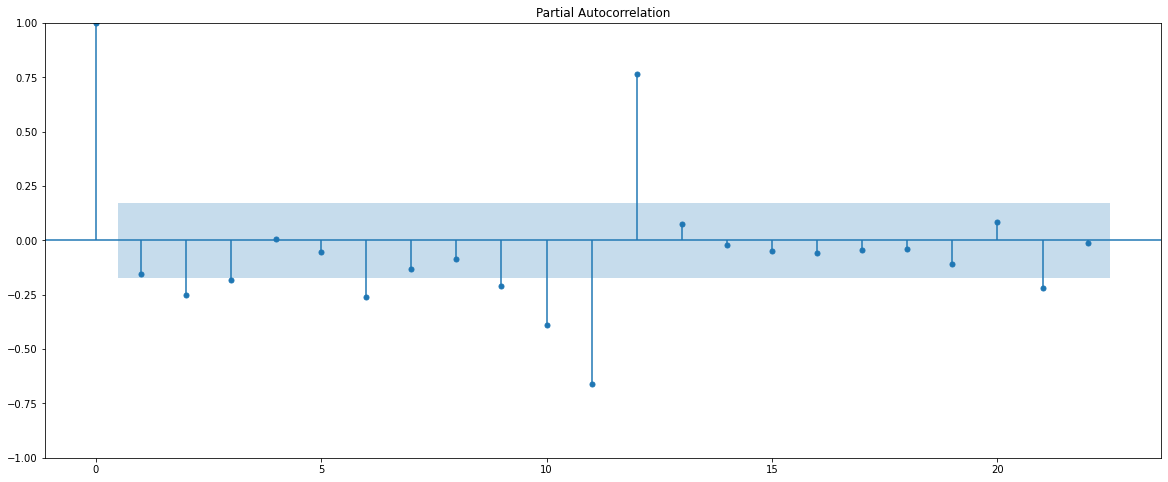

In [1440]:
plot_acf(train_diff,lags=30)
plot_pacf(train_diff);

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### ARIMA

In [1441]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 0 as we have already taken a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [1442]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [1443]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323131676
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.5272004508324
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.7776263084434
ARIMA(2, 1, 2) - AIC:2213.5092122831566


In [1444]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2213.509212
7,"(2, 1, 1)",2233.777626
2,"(0, 1, 2)",2234.408323
5,"(1, 1, 2)",2234.527200
4,"(1, 1, 1)",2235.755095
6,"(2, 1, 0)",2260.365744
1,"(0, 1, 1)",2263.060016
3,"(1, 1, 0)",2266.608539
0,"(0, 1, 0)",2267.663036


In [1445]:
mod = ARIMA(train['Sparkling'], order=(2,1,1))

results_Arima = mod.fit()

print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1112.889
Date:                Sun, 20 Mar 2022   AIC                           2233.778
Time:                        16:35:22   BIC                           2245.278
Sample:                    01-31-1980   HQIC                          2238.451
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5194      0.119      4.359      0.000       0.286       0.753
ar.L2         -0.1782      0.196     -0.908      0.364      -0.563       0.206
ma.L1         -0.9993      0.667     -1.499      0.1

The above model is an AutoRegressive Integrated Moving Average model of order (2,1,1) i.e. the Time Series being regressed upon itself at a lag of 2, the errors from a lag of 1 and a lag and a degree or order differencing of 1 to make it stationary.

### Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [1446]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [1447]:
from sklearn.metrics import mean_squared_error

In [1448]:
predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA

1991-01-31    3957.667270
1991-02-28    2558.511407
1991-03-31    2204.093443
1991-04-30    2269.356341
1991-05-31    2366.423290
1991-06-30    2405.213100
1991-07-31    2408.062639
1991-08-31    2402.629507
1991-09-30    2399.299413
1991-10-31    2398.537921
1991-11-30    2398.735872
1991-12-31    2398.974414
1992-01-31    2399.063045
1992-02-29    2399.066570
1992-03-31    2399.052604
1992-04-30    2399.044722
1992-05-31    2399.043116
1992-06-30    2399.043687
1992-07-31    2399.044270
1992-08-31    2399.044471
1992-09-30    2399.044471
1992-10-31    2399.044436
1992-11-30    2399.044417
1992-12-31    2399.044414
1993-01-31    2399.044416
1993-02-28    2399.044417
1993-03-31    2399.044417
1993-04-30    2399.044417
1993-05-31    2399.044417
1993-06-30    2399.044417
1993-07-31    2399.044417
1993-08-31    2399.044417
1993-09-30    2399.044417
1993-10-31    2399.044417
1993-11-30    2399.044417
1993-12-31    2399.044417
1994-01-31    2399.044417
1994-02-28    2399.044417
1994-03-31  

In [1449]:
results_Arima.predict(start=pd.to_datetime('1991-01-31'),end=pd.to_datetime('1995-07-31 '),typ = 'level',dynamic=True,full_results=True)

1991-01-31    3957.667270
1991-02-28    2558.511407
1991-03-31    2204.093443
1991-04-30    2269.356341
1991-05-31    2366.423290
1991-06-30    2405.213100
1991-07-31    2408.062639
1991-08-31    2402.629507
1991-09-30    2399.299413
1991-10-31    2398.537921
1991-11-30    2398.735872
1991-12-31    2398.974414
1992-01-31    2399.063045
1992-02-29    2399.066570
1992-03-31    2399.052604
1992-04-30    2399.044722
1992-05-31    2399.043116
1992-06-30    2399.043687
1992-07-31    2399.044270
1992-08-31    2399.044471
1992-09-30    2399.044471
1992-10-31    2399.044436
1992-11-30    2399.044417
1992-12-31    2399.044414
1993-01-31    2399.044416
1993-02-28    2399.044417
1993-03-31    2399.044417
1993-04-30    2399.044417
1993-05-31    2399.044417
1993-06-30    2399.044417
1993-07-31    2399.044417
1993-08-31    2399.044417
1993-09-30    2399.044417
1993-10-31    2399.044417
1993-11-30    2399.044417
1993-12-31    2399.044417
1994-01-31    2399.044417
1994-02-28    2399.044417
1994-03-31  

In [1450]:
RMSE_autoARIMA = mean_squared_error(test['Sparkling'],predicted_autoARIMA,squared=False)
MAPE_autoARIMA = MAPE(test['Sparkling'],predicted_autoARIMA)

print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA,'\nMAPE for the autofit ARIMA model:',MAPE_autoARIMA)

RMSE for the autofit ARIMA model: 1300.7213820120776 
MAPE for the autofit ARIMA model: 39.86


In [1451]:
resultsDf = pd.DataFrame({'RMSE': [RMSE_autoARIMA],'MAPE':[MAPE_autoARIMA]}
                           ,index=['ARIMA(2,1,1)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,1)",1300.721382,39.86


### Forecast the values for the next 24 months using the ARIMA model just built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

In [1452]:
pred_dynamic = results_Arima.get_prediction(start=pd.to_datetime('1996-01-01'), dynamic=True, full_results=True)

In [1453]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [1454]:
pred95 = results_Arima.get_forecast(steps=24, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [1455]:
forecast_fullmodel_autoarima = pred95.predicted_mean

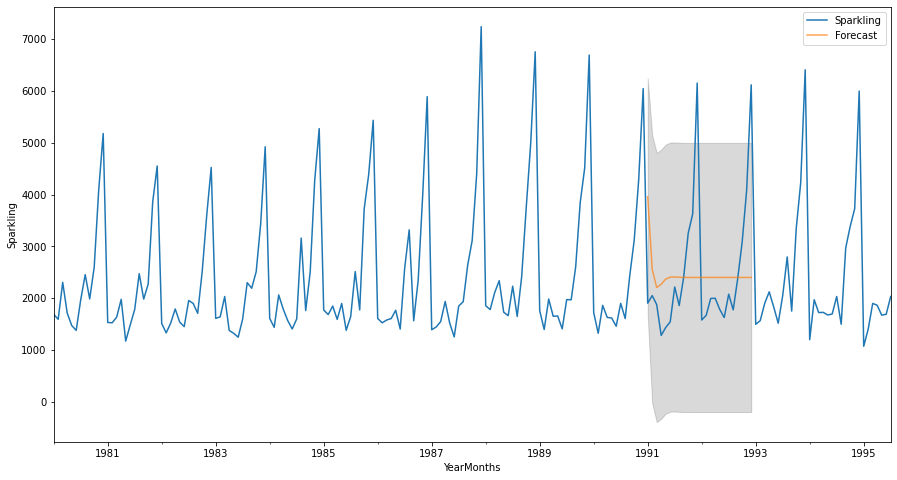

In [1456]:
# plot the forecast along with the confidence band

axis = df.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autoarima.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autoarima.index, pred_ci_95['lower Sparkling'], pred_ci_95['upper Sparkling'], color='k', alpha=.15)
axis.set_xlabel('YearMonths')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

For a ARIMA model, we can see the predictions with 95% confidence interval bands. The seasonality was unable to be captured. Let us try out a SARIMA model.

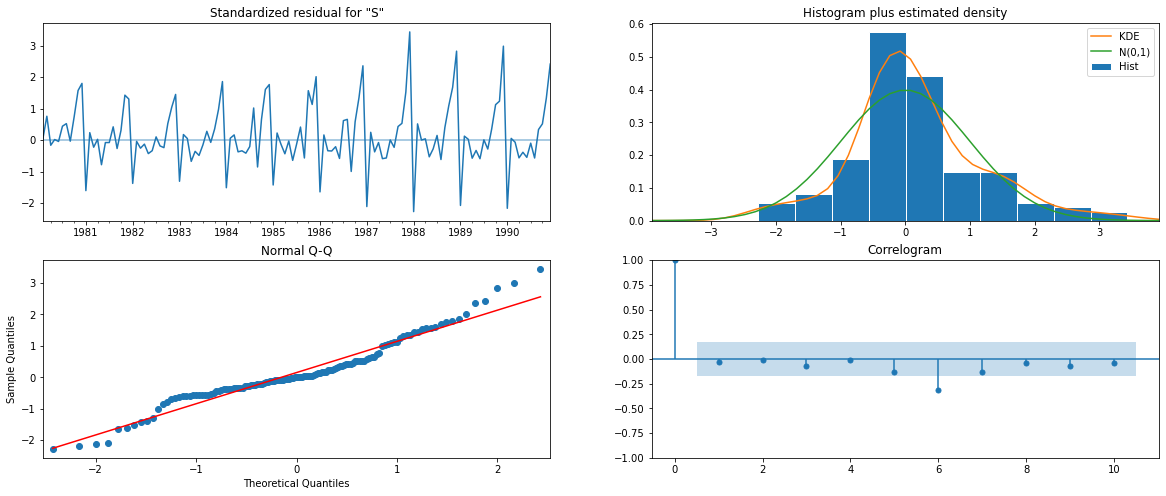

In [1457]:
results_Arima.plot_diagnostics();

### SARIMA

In [1458]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [1459]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [1460]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.2614616842675
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.1533640235496
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.9905301389083
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735791944
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.2054158611443
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.9898053920774
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2230.1629078505853
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1923.768864956687
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:1692.708957278316
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1797.1795881838032
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1738.090319373017
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:1570.13196585489
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:1605.6751954176586
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:1599.2245088165164
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:1570.40188331304

In [1461]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.934563
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121563
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340404


In [1462]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1,1,0),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood                -803.245
Date:                                 Sun, 20 Mar 2022   AIC                           1616.489
Time:                                         16:37:11   BIC                           1629.807
Sample:                                     01-31-1980   HQIC                          1621.887
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3905      0.084     -4.640      0.000      -0.555      -0

### Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [1463]:
predicted_autoSARIMA = results_SARIMA.forecast(steps=len(test))
predicted_autoSARIMA

1991-01-31     967.890860
1991-02-28     616.610002
1991-03-31    1116.432043
1991-04-30     979.001077
1991-05-31     847.535927
1991-06-30     636.286360
1991-07-31    1215.759850
1991-08-31    1164.717018
1991-09-30    1645.711511
1991-10-31    2639.376551
1991-11-30    3904.088115
1991-12-31    5960.340167
1992-01-31     561.758364
1992-02-29     248.974389
1992-03-31     746.123757
1992-04-30     620.099805
1992-05-31     466.698564
1992-06-30     239.277007
1992-07-31     860.867937
1992-08-31     847.768178
1992-09-30    1297.402132
1992-10-31    2378.502815
1992-11-30    3693.173585
1992-12-31    5875.293306
1993-01-31     232.919785
1993-02-28     -87.200140
1993-03-31     428.697232
1993-04-30     298.236918
1993-05-31     137.986641
1993-06-30     -98.929713
1993-07-31     548.934380
1993-08-31     535.300741
1993-09-30    1003.970275
1993-10-31    2130.862997
1993-11-30    3501.213975
1993-12-31    5775.755497
1994-01-31    -105.594823
1994-02-28    -439.273006
1994-03-31  

In [1464]:
RMSE_autoSARIMA = mean_squared_error(test['Sparkling'],predicted_autoSARIMA,squared=False)
MAPE_autoSARIMA = MAPE(test['Sparkling'],predicted_autoSARIMA)

print('RMSE for the autofit SARIMA model:',RMSE_autoSARIMA,'\nMAPE for the autofit SARIMA model:',MAPE_autoSARIMA)

RMSE for the autofit SARIMA model: 1439.4737869418968 
MAPE for the autofit SARIMA model: 53.9


In [1465]:
temp_resultsDf = pd.DataFrame({'RMSE': [RMSE_autoSARIMA],'MAPE':[MAPE_autoSARIMA]}
                           ,index=['SARIMA(1, 1, 0)(1,0,2)12'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,RMSE,MAPE
"ARIMA(2,1,1)",1300.721382,39.86
"SARIMA(1, 1, 0)(1,0,2)12",1439.473787,53.90


### Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) SARIMA model.

In [1466]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,0),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_fullmodel = mod.fit()
print(results_SARIMA_fullmodel.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1216.617
Date:                                 Sun, 20 Mar 2022   AIC                           2443.235
Time:                                         16:37:14   BIC                           2458.642
Sample:                                     01-31-1980   HQIC                          2449.491
                                          - 07-31-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4163      0.064     -6.474      0.000      -0.542      -0

### Forecast the values for the next 24 months using the SARIMA model built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

In [1467]:
pred_dynamic = results_SARIMA_fullmodel.get_prediction(start=pd.to_datetime('1996-01-01'), dynamic=True, full_results=True)

In [1468]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [1469]:
pred95 = results_SARIMA_fullmodel.get_forecast(steps=24, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [1470]:
forecast_fullmodel_autosarima = pred95.predicted_mean

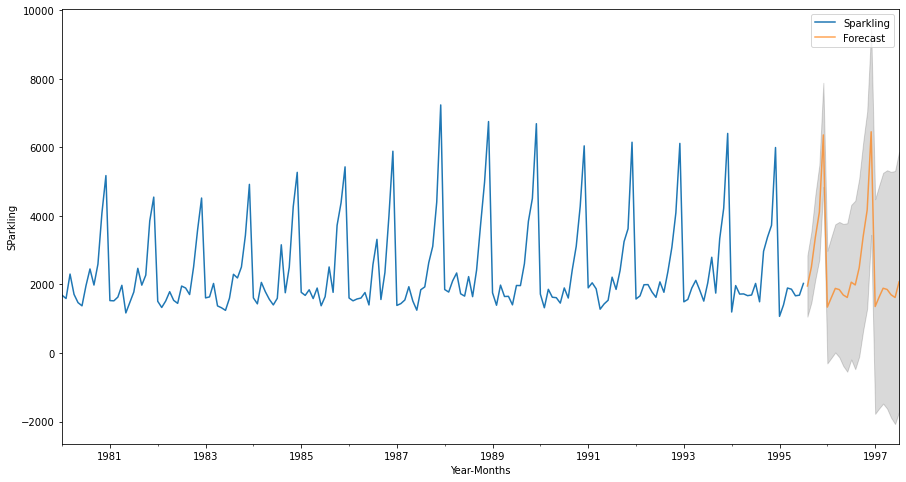

In [1471]:
# plot the forecast along with the confidence band

axis = df.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autosarima.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autosarima.index, pred_ci_95['lower Sparkling'], pred_ci_95['upper Sparkling'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('SParkling')
plt.legend(loc='best')
plt.show()

We see that we have certainly been able to take advantage of seasonality to get a better prediction with thinner confidence intervals

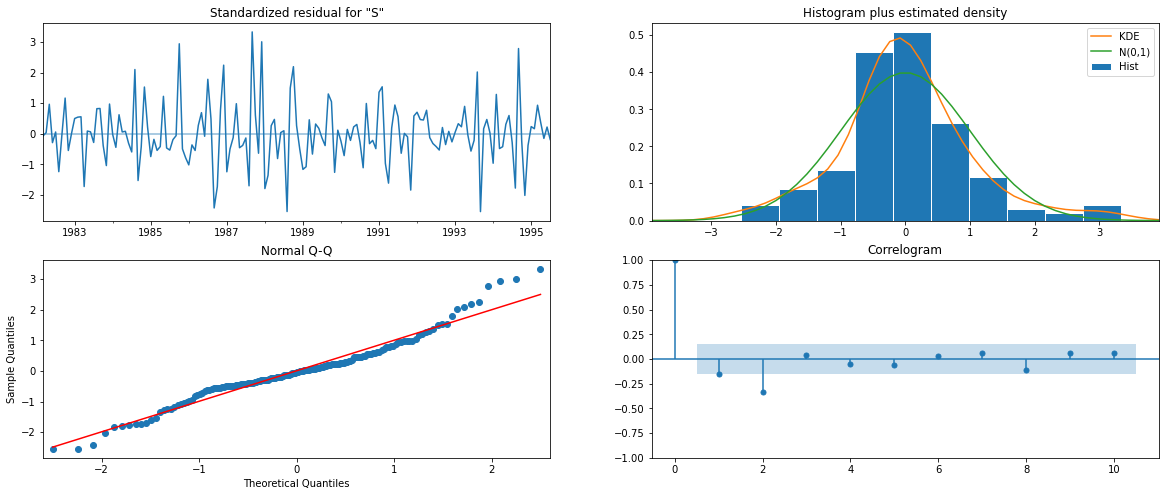

In [1472]:
results_SARIMA_fullmodel.plot_diagnostics();

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Let us look at the ACF and the PACF plots once more.

### ARIMA

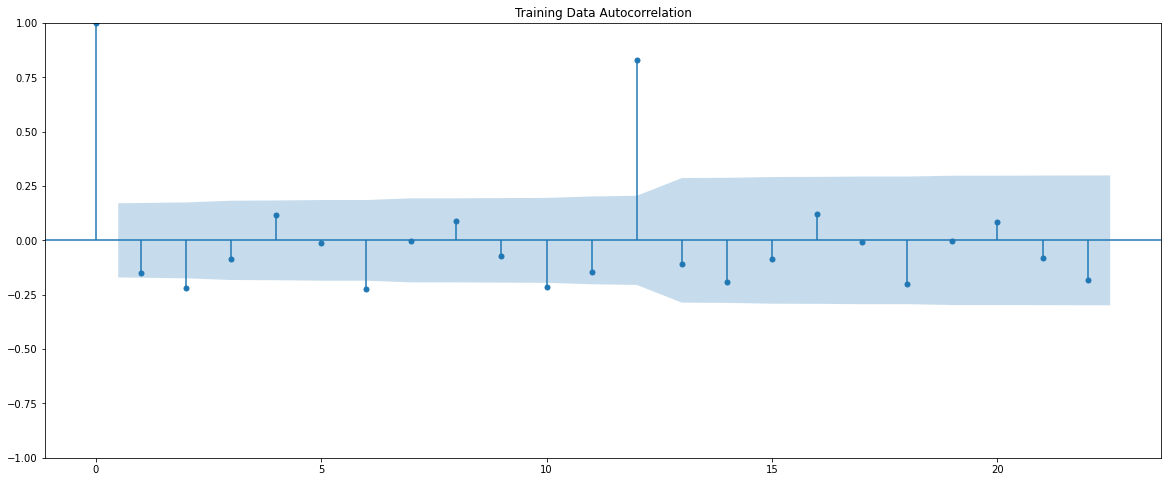

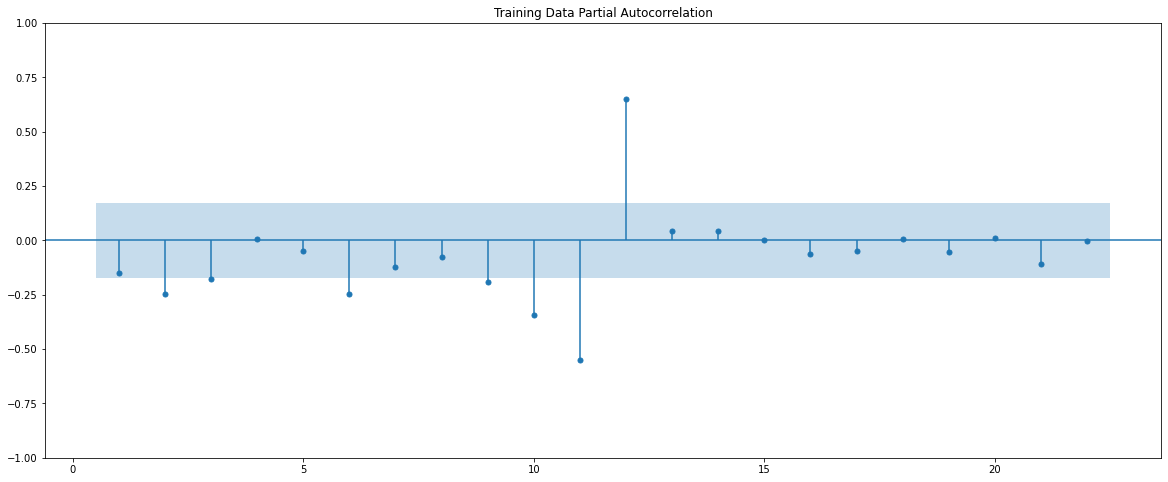

In [1473]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

- The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
- The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 3.

By looking at the above plots, we will take the value of p and q to be 3 and 1 respectively.

In [1474]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,3),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1103.729
Date:                Sun, 20 Mar 2022   AIC                           2221.459
Time:                        16:37:18   BIC                           2241.585
Sample:                    01-31-1980   HQIC                          2229.637
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4798      0.146      3.284      0.001       0.193       0.766
ar.L2         -0.9868      0.053    -18.619      0.000      -1.091      -0.883
ar.L3          0.4862      0.117      4.150      0.0

Let us analyse the residuals from the various diagnostics plot.

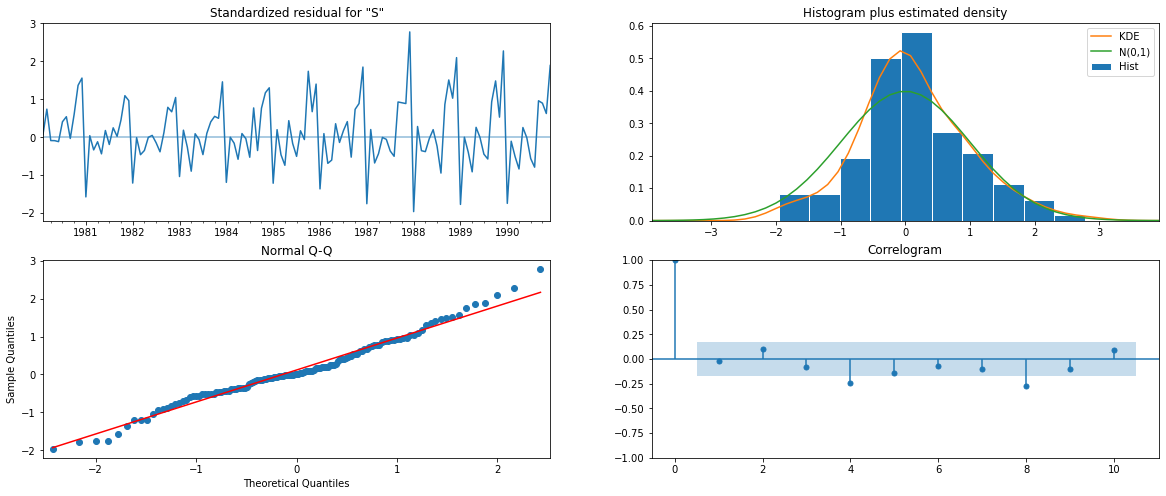

In [1475]:
results_manual_ARIMA.plot_diagnostics();

### Predict on the Test Set using this model and evaluate the model.

In [1476]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [1477]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [1478]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1229.0304371707914 
MAPE: 39.53563611668447


In [1479]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,1)",1300.721382,39.860000
"SARIMA(1, 1, 0)(1,0,2)12",1439.473787,53.900000
"ARIMA(3,1,3)",1229.030437,39.535636


### SARIMA

Let us look at the ACF and the PACF plots once more.

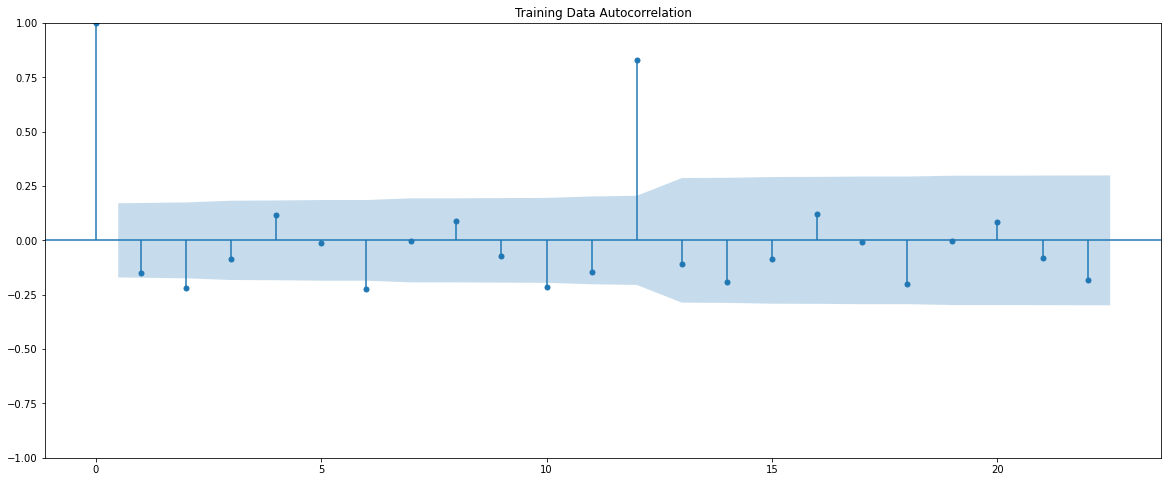

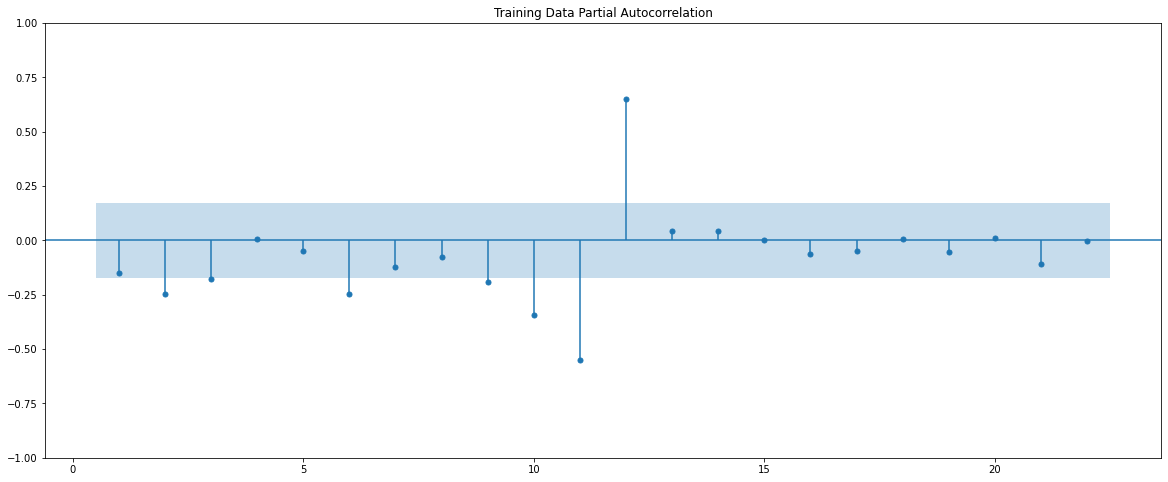

In [1480]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 3 or its multiple e.g. 6. We are taking the p value to be 3 and the q value also to be 3 as the parameters same as the ARIMA model.

- The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
- The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.

Remember to check the ACF and the PACF plots only at multiples of 3 (since 3 is the seasonal period).

In [1481]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 6)   Log Likelihood                -878.920
Date:                           Sun, 20 Mar 2022   AIC                           1777.840
Time:                                   16:37:27   BIC                           1804.753
Sample:                               01-31-1980   HQIC                          1788.754
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4783      1.307      0.366      0.714      -2.084       3.040
ar.L2          0.5232      1.657      0.316

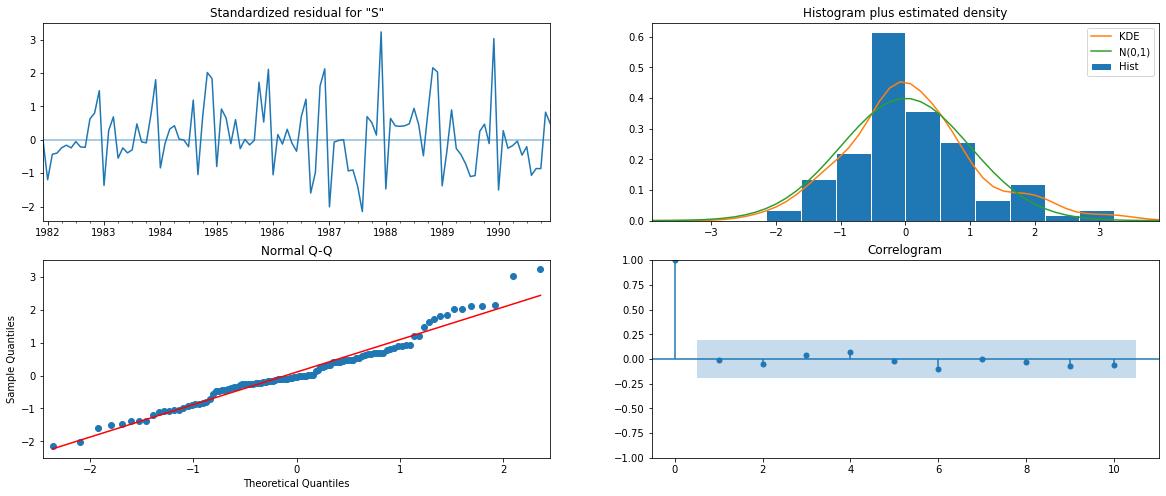

In [1482]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [1483]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [1484]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1238.5479236084896 
MAPE: 44.84987130150208


In [1485]:
resultsDf_temp_C = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,resultsDf_temp_C])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,1)",1300.721382,39.860000
"SARIMA(1, 1, 0)(1,0,2)12",1439.473787,53.900000
"ARIMA(3,1,3)",1229.030437,39.535636
"SARIMA(3,1,3)(0,0,3,6)",1238.547924,44.849871


This is where our model building exercise ends.

### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [1486]:

resultsDf = pd.concat([resultsDf,resultsDf_1,resultsDf_2,resultsDf_4,resultsDf_temp_A,resultsDf_temp_B,resultsDf_temp_D,resultsDf_temp_E,])

resultsDf

,RMSE,MAPE,Test RMSE
"ARIMA(2,1,1)",1300.721382,39.860000,NaN
"SARIMA(1, 1, 0)(1,0,2)12",1439.473787,53.900000,NaN
"ARIMA(3,1,3)",1229.030437,39.535636,NaN
"SARIMA(3,1,3)(0,0,3,6)",1238.547924,44.849871,NaN
RegressionOnTime,NaN,NaN,1798.200700
NaiveModel,NaN,NaN,3864.279352
SimpleAverageModel,NaN,NaN,1275.081804
"Alpha=0.99,SES",NaN,NaN,1338.008384
"Alpha=1,Beta=0.0189:DES",NaN,NaN,5291.879833
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",NaN,NaN,378.951023


Thus dataframe has been created with all the models built along their corresponding parameters and the respective RMSE Values on the test data.

### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

### Building the most optimum model on the Full Data.
Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [1487]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood               -1208.937
Date:                           Sun, 20 Mar 2022   AIC                           2439.873
Time:                                   16:50:05   BIC                           2473.972
Sample:                               01-31-1980   HQIC                          2453.716
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5919      0.222      2.662      0.008       0.156       1.028
ma.L1         -1.7762      0.459     -3.867

#### Note: If we have a scenario where our training data was stationary but our full data was not stationary. We can still use the same parameters as our training data but with adding an appropriate level of differencing or transformation which is needed for the data to be stationary.

### Evaluate the model on the whole data and predict 12 months into the future (till the end of next year).

In [1488]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [1489]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1804.011936,374.944458,1069.134302,2538.889570
1995-09-30,2363.049111,380.873669,1616.550438,3109.547784
1995-10-31,3243.934160,380.971530,2497.243681,3990.624638
1995-11-30,4001.155575,381.070645,3254.270834,4748.040315
1995-12-31,6259.122251,381.542100,5511.313477,7006.931025


In [1490]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 576.3037804853504


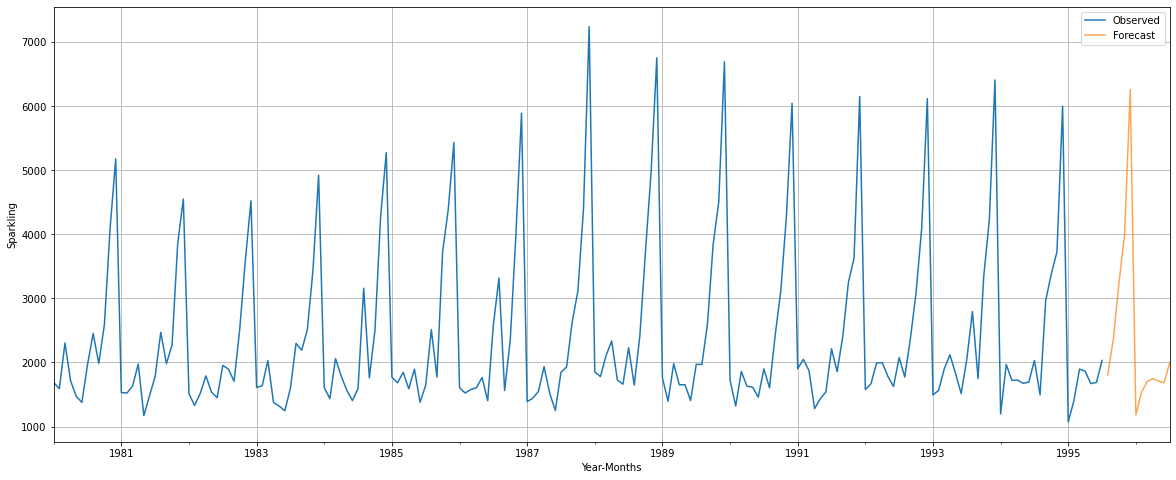

In [1492]:
axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

In [1493]:
resultsDf

,RMSE,MAPE,Test RMSE
"ARIMA(2,1,1)",1300.721382,39.860000,NaN
"SARIMA(1, 1, 0)(1,0,2)12",1439.473787,53.900000,NaN
"ARIMA(3,1,3)",1229.030437,39.535636,NaN
"SARIMA(3,1,3)(0,0,3,6)",1238.547924,44.849871,NaN
RegressionOnTime,NaN,NaN,1798.200700
NaiveModel,NaN,NaN,3864.279352
SimpleAverageModel,NaN,NaN,1275.081804
"Alpha=0.99,SES",NaN,NaN,1338.008384
"Alpha=1,Beta=0.0189:DES",NaN,NaN,5291.879833
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",NaN,NaN,378.951023


### 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

### Inference
- The data of different types of wine sales in the 20th century is to be analyzed. These data are from the same company but of different wines. As an analyst, you are tasked to analyze and forecast Wine Sales in the 20th century.
- Therefore at first the data has been read and the time series have been plotted to understand the behaviour of the data.
- We have extracted Month and Year columns in addition to the index as the date columnin addition to the remaining columns of a dataframe which is ‘Sparkling’.
- The plot of time series when we plot the time series data pertaining to the sales ofSparkling wine over the years January 1980 through July 1995.
- The trend of the monthly sales spanning over the years is as shown above. It can be observed:
1. 1988 recorded the highest sales for the Sparkling wine among all years in comparison.
2. Barring 1995 where we have data for only a few months of the year (till July), we noticethat the sales are plateaued since 1990 after experiencing highs in 1989 and 1990.
- The plot shows the behavior of monthly 'Sparkling Wine Sales' across years where January, February, May, November and December Sales are on a declinein 1994 in comparison to their respective values for the previous year and March, April, June, July, September and October Sales are on an upswingin 1994 in comparison to their respective values for the previous year.
- The average sales of all months over the years also show a pattern ofincreasing sales in the 2nd half of the year (July - December).
- Boxplot have been plotted to understand the spread of accidents across different years and within different months across years and also daily.
- Decomposition has been taken place in order to find the trend,seasonality and residual values which is 1966 for additive decomposition.
- Later the data has been split into train and test data.
- The exponential smoothing models are built on the training data and evaluate the model using RMSE on the test data which is observed as
1. Simple Exponential Smoothing --- 1338 (Test RMSE).
2. Double Exponential Smoothing --- 5291.87 (Test RMSE).
3. Triple Exponential Smoothing(when alpha=0.25) --- 378.95 (Test RMSE)
4. Triple Exponential Smoothing (when alpha=0.74) ---404.28 (Test RMSE)
- Therefore the model with low test Root mean square error is said to be best model. So Triple exponential smoothing model(when alpha =0.25) performs best.
- Other models including,
1. Linear Regression --- 1798.2 (Test RMSE)
2. Naive approach --- 3864.27 (Test RMSE)
3. Simple Average --- 1275.08 (Test RMSE)
- On comparing the above models, Simple average model has least RMSE which is said to be best model.
- The automated version of the ARIMA/SARIMA model in performed using the lowest Akaike Information Criteria (AIC).
- The predicted RMSE and MAPE for ARIMA/SARIMA iS said to be,
1. ARIMA(2,1,1) ---	1300.72(RMSE)	39.860000(MAPE)	
2. SARIMA(1, 1, 0)(1,0,2)12 --- 1439.47(RMSE)	53.90(MAPE)
3. ARIMA(3,1,3)--- 1229.03(RMSE)	39.53(MAPE)
4. SARIMA(3,1,3)(0,0,3,6)--- 1238.54(RMSE)	44.84(MAPE)
- On comparing the above models, SARIMA is performed to be the best with least error.

## END